# Insurance Claims Data analysis and Predictive Model

**Business Objective:**

AlphaCare Insurance Solutions (ACIS) aims to leverage advanced risk and predictive analytics to improve car insurance planning and marketing in South Africa. As a marketing analytics engineer, your role is to analyze historical insurance claim data to optimize marketing strategies and identify low-risk targets for premium reductions, thereby attracting new clients.

In [25]:
import sys
sys.path.append('../src')
from data_loader import DataLoader
from data_quality_check import missing_values_summary
import pandas as pd

In [40]:
# Load the data
file_path = '../data/MachineLearningRating_v3.txt'
data_loader = DataLoader(file_path)
df = data_loader.load_data()

In [16]:

data_loader.display_head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [17]:
# Display basic info
data_loader.basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [41]:
# Convert columns to appropriate data types
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['PostalCode'] = df['PostalCode'].astype(str)
df['mmcode'] = df['mmcode'].astype('Int64')  # Use 'Int64' for nullable integers
df['Cylinders'] = df['Cylinders'].astype('Int64')
df['NumberOfDoors'] = df['NumberOfDoors'].astype('Int64')
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
df['NewVehicle'] = df['NewVehicle'].astype('bool')
df['WrittenOff'] = df['WrittenOff'].astype('bool')
df['Rebuilt'] = df['Rebuilt'].astype('bool')
df['Converted'] = df['Converted'].astype('bool')
df['CrossBorder'] = df['CrossBorder'].astype('bool')

# Convert categorical columns to 'category' data type
categorical_columns = [
    'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
    'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
    'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
    'AlarmImmobiliser', 'TrackingDevice', 'TermFrequency', 'ExcessSelected',
    'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
    'StatutoryClass', 'StatutoryRiskType'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')
# Check the data types to confirm changes
print(df.dtypes)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\3677959769.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                          category
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                           category
Province                          category
PostalCode                          object
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                          category
mmcode                               Int64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

In [42]:
missing_values_summary(df)

,Missing Values,Percentage
NumberOfVehiclesInFleet,1000098,100.000000
CustomValueEstimate,779642,77.956560
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507
MaritalStatus,8259,0.825819
VehicleType,552,0.055195
mmcode,552,0.055195
make,552,0.055195
Cylinders,552,0.055195


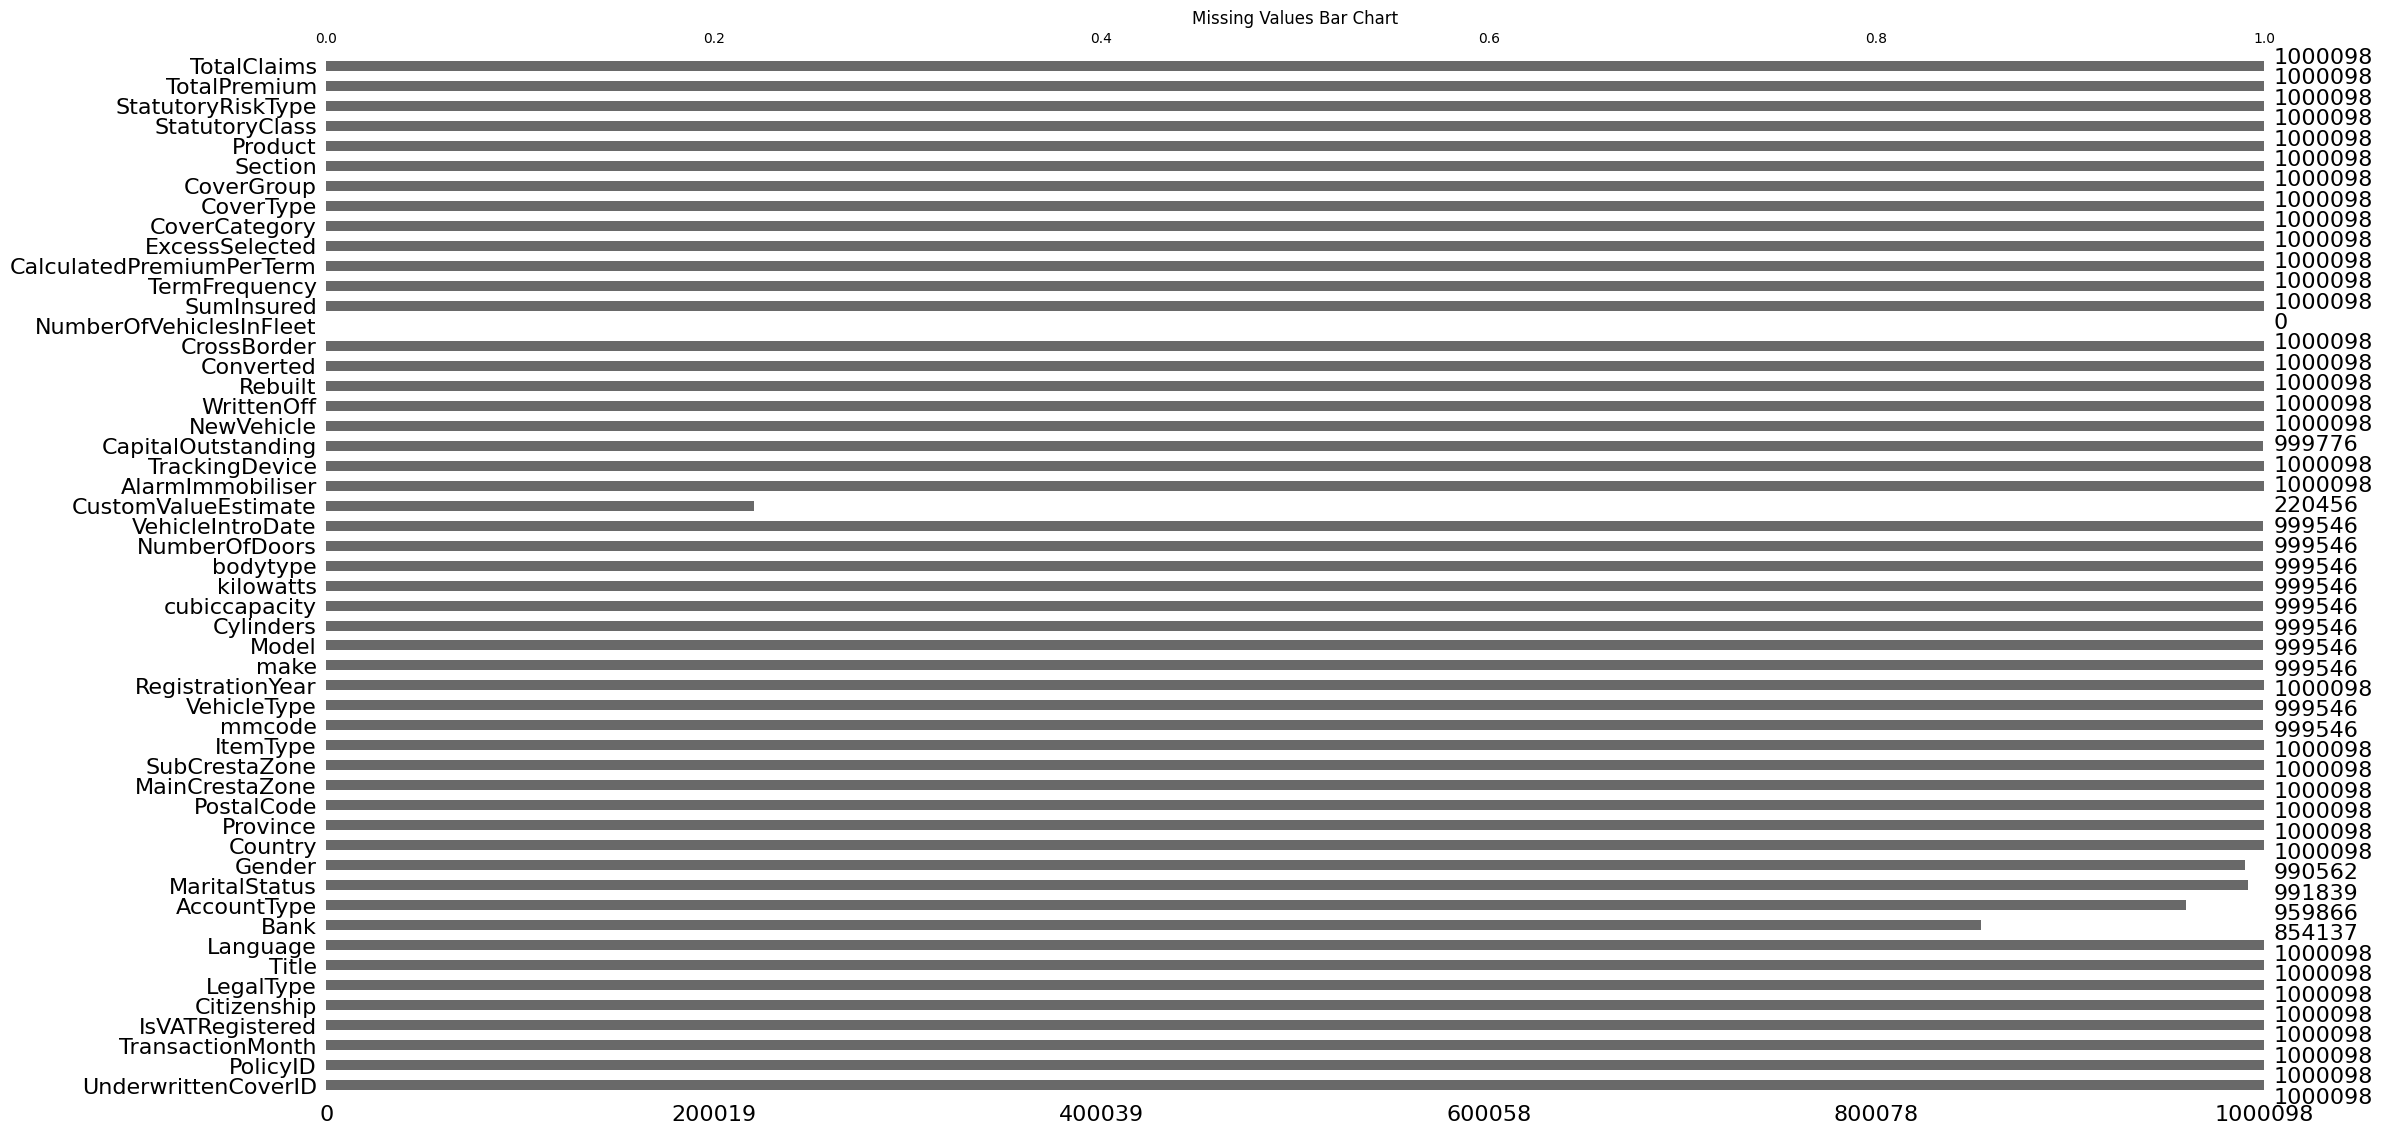

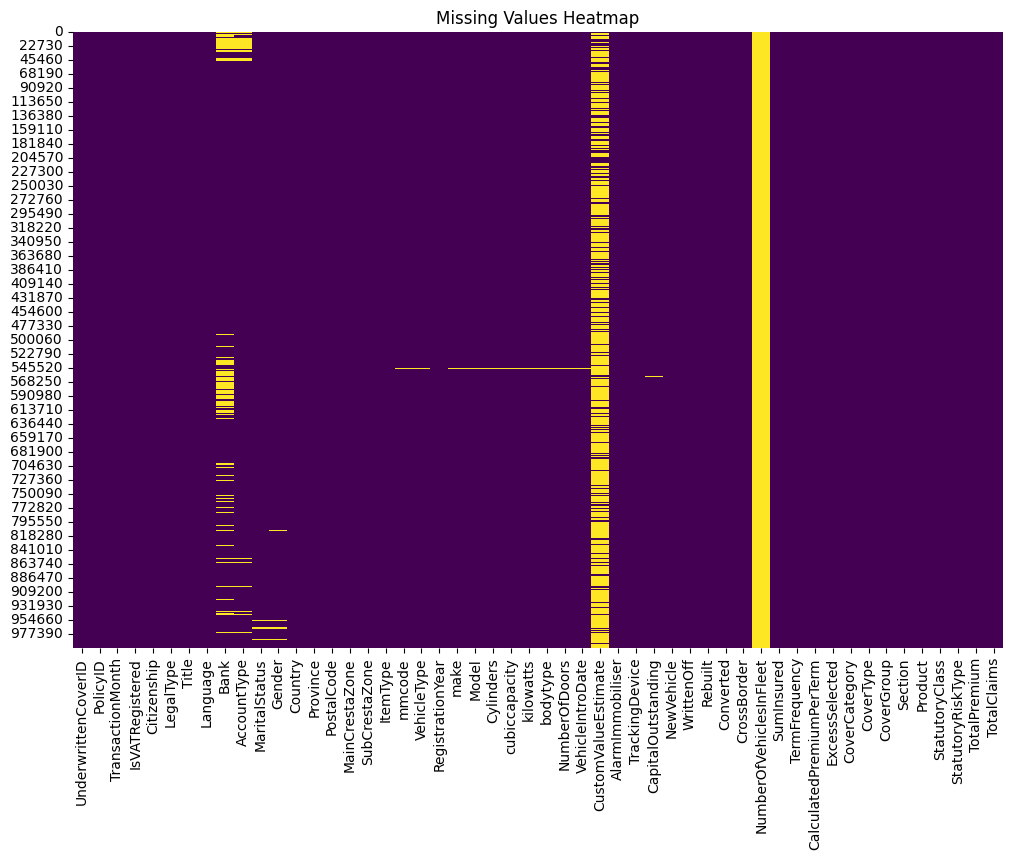

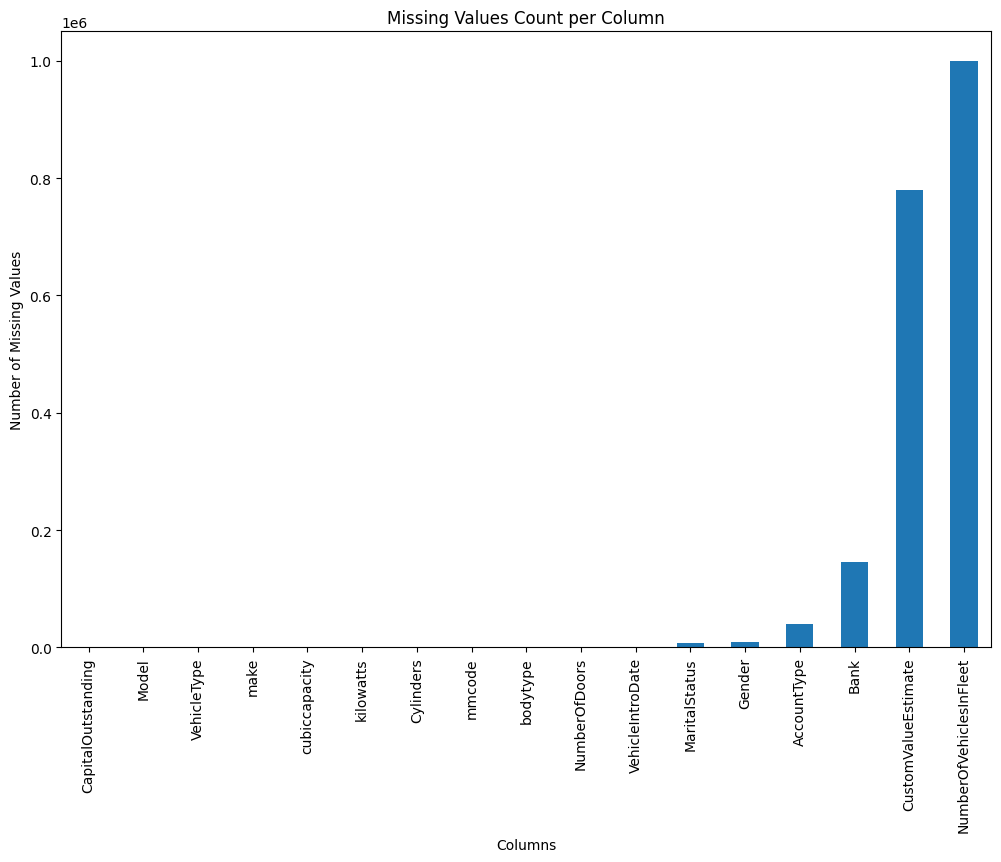

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

# Heatmap of missing values using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Count of missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# Bar plot of missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


In [32]:
unique_counts = df.nunique()

print(unique_counts)

UnderwrittenCoverID         116532
PolicyID                      7000
TransactionMonth                23
IsVATRegistered                  2
Citizenship                      4
LegalType                        6
Title                            5
Language                         1
Bank                            11
AccountType                      3
MaritalStatus                    3
Gender                           3
Country                          1
Province                         9
PostalCode                     888
MainCrestaZone                  16
SubCrestaZone                   45
ItemType                         1
mmcode                         427
VehicleType                      5
RegistrationYear                25
make                            46
Model                          411
Cylinders                        7
cubiccapacity                  122
kilowatts                       82
bodytype                        13
NumberOfDoors                    6
VehicleIntroDate    

In [33]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in UnderwrittenCoverID: [145249 145255 145247 ... 265173 265181  16093]
Unique values in PolicyID: [12827 10874 10173 ... 22498   807 22854]
Unique values in TransactionMonth: <DatetimeArray>
['2015-03-01 00:00:00', '2015-05-01 00:00:00', '2015-07-01 00:00:00',
 '2015-01-01 00:00:00', '2015-04-01 00:00:00', '2015-06-01 00:00:00',
 '2015-08-01 00:00:00', '2015-02-01 00:00:00', '2014-12-01 00:00:00',
 '2014-11-01 00:00:00', '2014-10-01 00:00:00', '2014-09-01 00:00:00',
 '2014-07-01 00:00:00', '2014-08-01 00:00:00', '2014-03-01 00:00:00',
 '2014-05-01 00:00:00', '2014-04-01 00:00:00', '2014-06-01 00:00:00',
 '2014-02-01 00:00:00', '2013-12-01 00:00:00', '2013-11-01 00:00:00',
 '2014-01-01 00:00:00', '2013-10-01 00:00:00']
Length: 23, dtype: datetime64[ns]
Unique values in IsVATRegistered: [ True False]
Unique values in Citizenship: ['  ', 'AF', 'ZA', 'ZW']
Categories (4, object): ['  ', 'AF', 'ZA', 'ZW']
Unique values in LegalType: ['Close Corporation', 'Individual', 'Partne

In [44]:
# Drop columns with high missing values
df = df.drop(columns=['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 'Rebuilt', 'Converted', 'WrittenOff'])

# Impute missing values
df['NewVehicle'].fillna(df['NewVehicle'].mode()[0], inplace=True)
df['Bank'].fillna(df['Bank'].mode()[0], inplace=True)
df['AccountType'].fillna(df['AccountType'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)

# Drop rows with missing values for specific columns
df.dropna(subset=['VehicleType', 'make', 'mmcode', 'Model', 'Cylinders', 'bodytype', 'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'cubiccapacity'], inplace=True)

# Drop or impute the very few missing values in CapitalOutstanding
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean(), inplace=True)

print(df.isnull().sum())

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\2471652396.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NewVehicle'].fillna(df['NewVehicle'].mode()[0], inplace=True)
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\2471652396.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999546 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       999546 non-null  int64         
 1   PolicyID                  999546 non-null  int64         
 2   TransactionMonth          999546 non-null  datetime64[ns]
 3   IsVATRegistered           999546 non-null  bool          
 4   Citizenship               999546 non-null  category      
 5   LegalType                 999546 non-null  category      
 6   Title                     999546 non-null  category      
 7   Language                  999546 non-null  category      
 8   Bank                      999546 non-null  category      
 9   AccountType               999546 non-null  category      
 10  MaritalStatus             999546 non-null  category      
 11  Gender                    999546 non-null  category      
 12  Countr

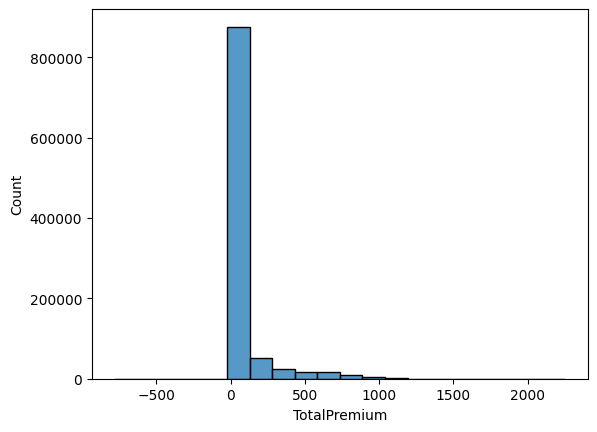

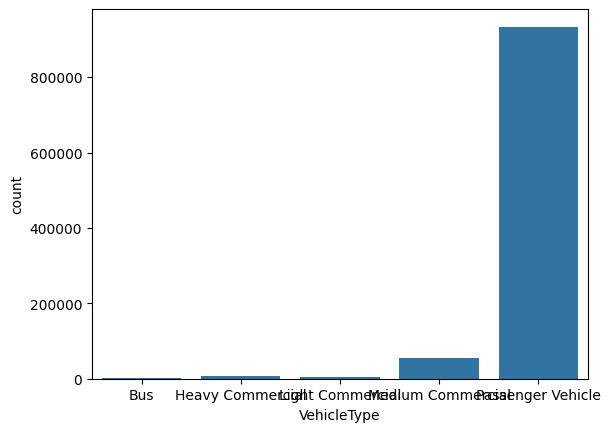

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for TotalPremium
sns.histplot(df['TotalPremium'], bins=20)
plt.show()

# Bar chart for VehicleType
sns.countplot(x='VehicleType', data=df)
plt.show()


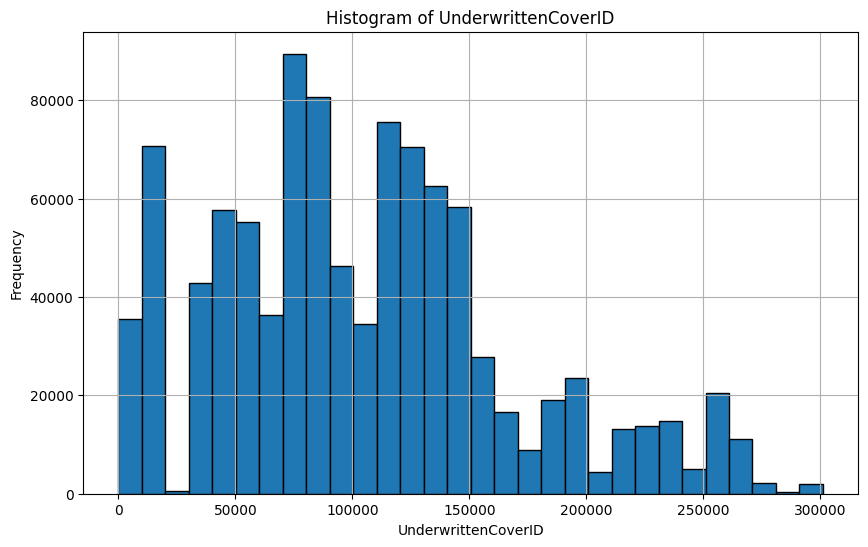

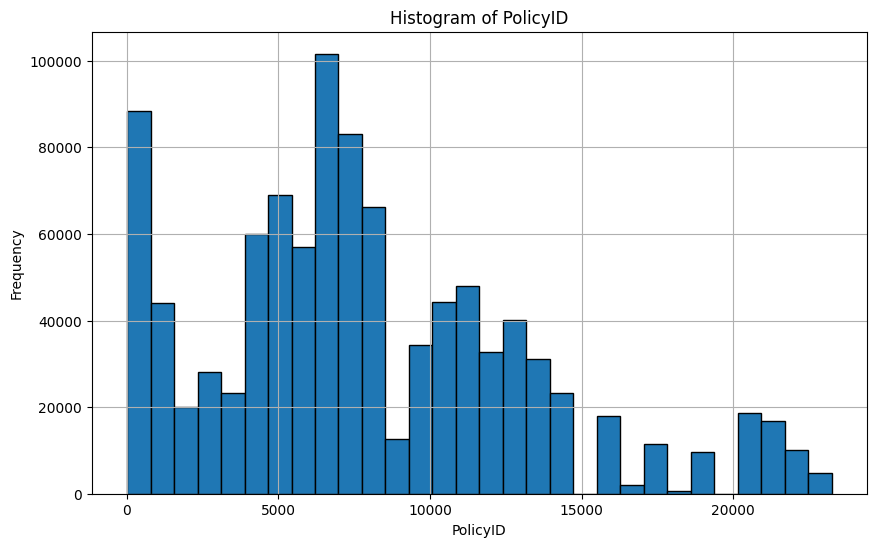

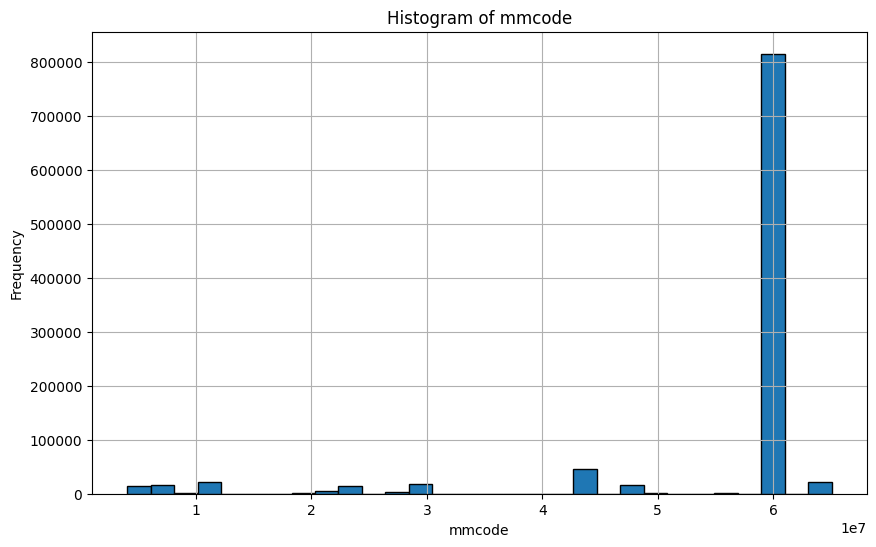

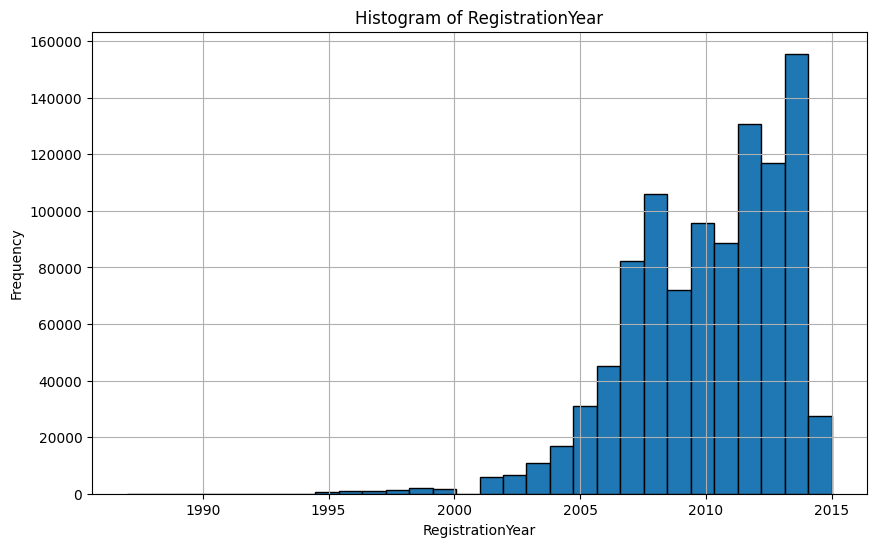

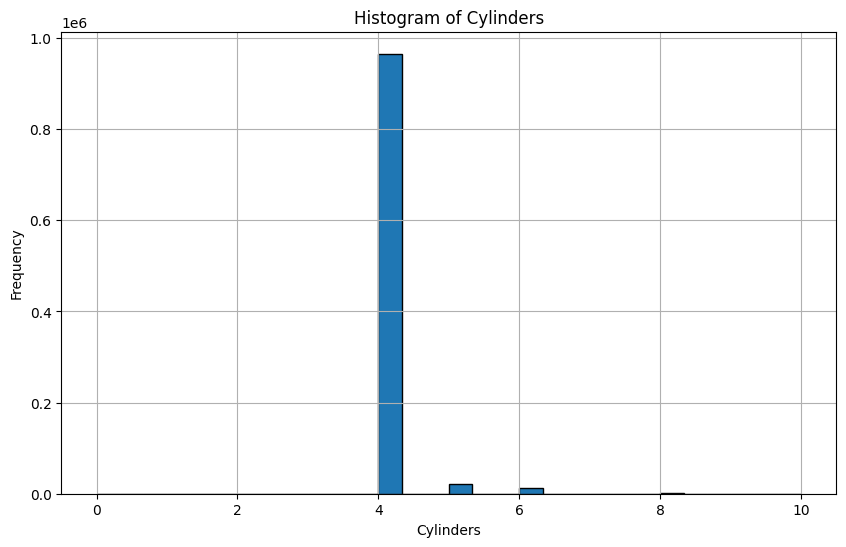

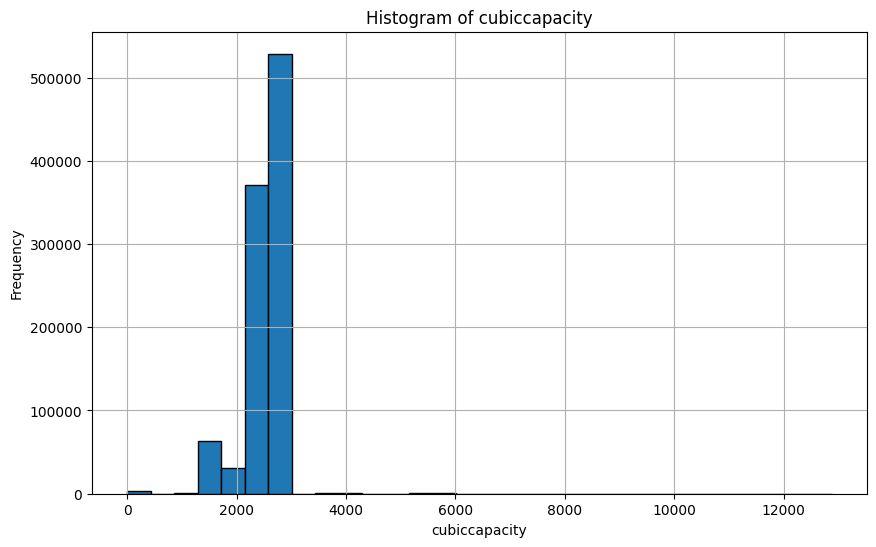

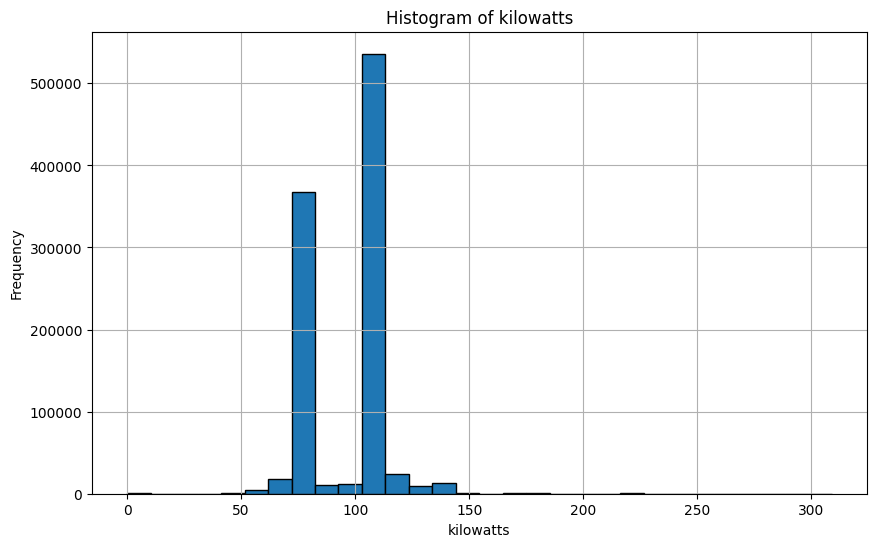

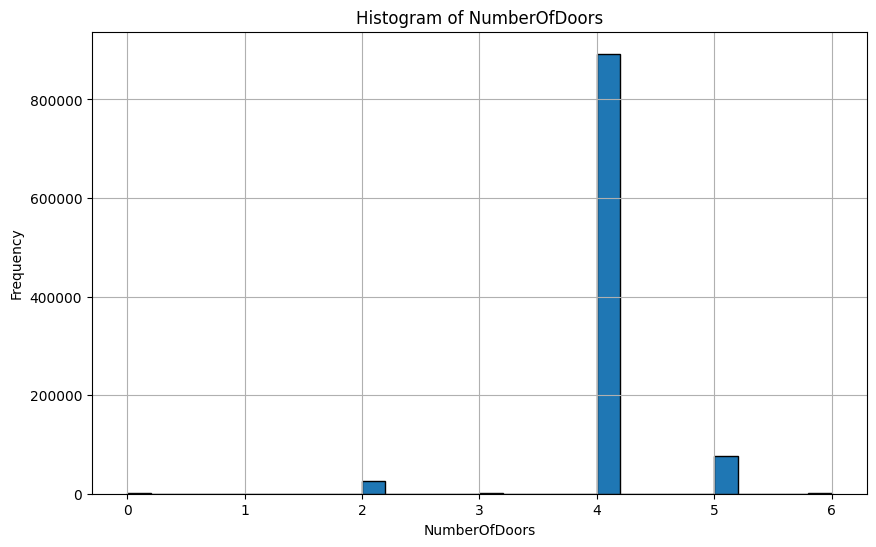

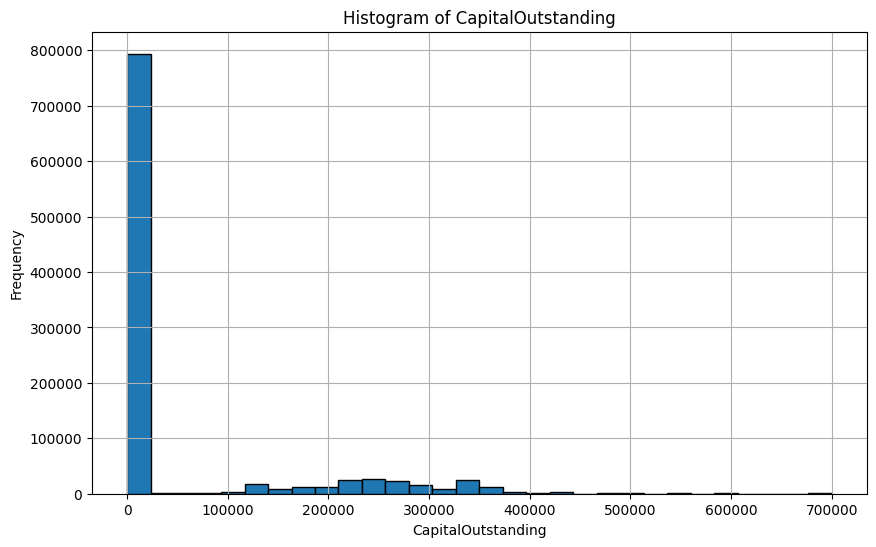

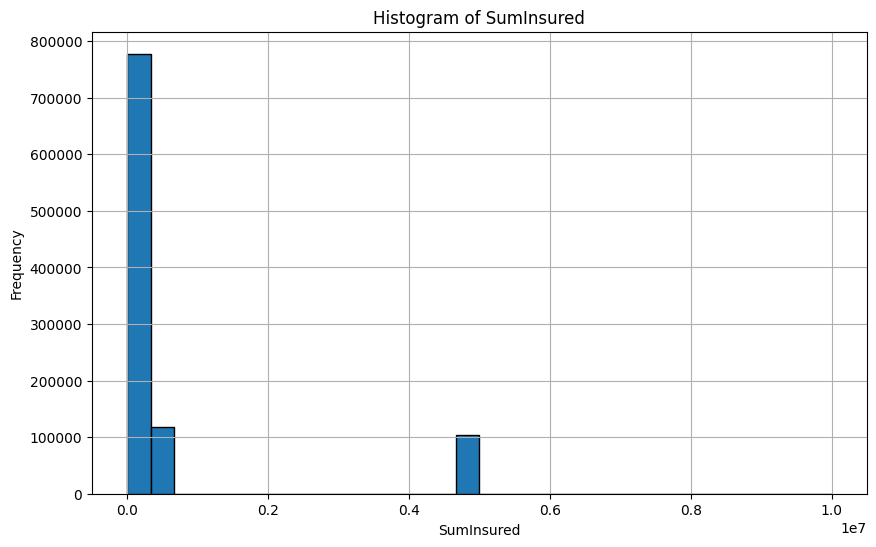

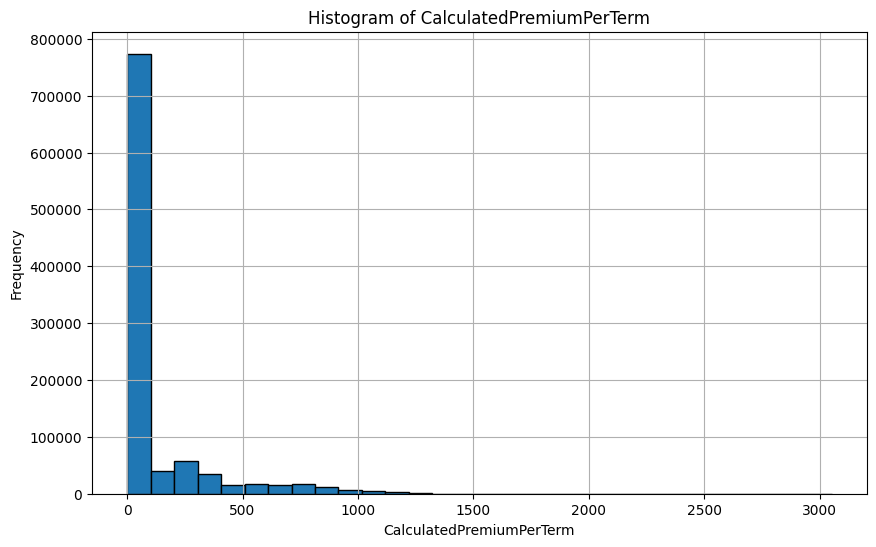

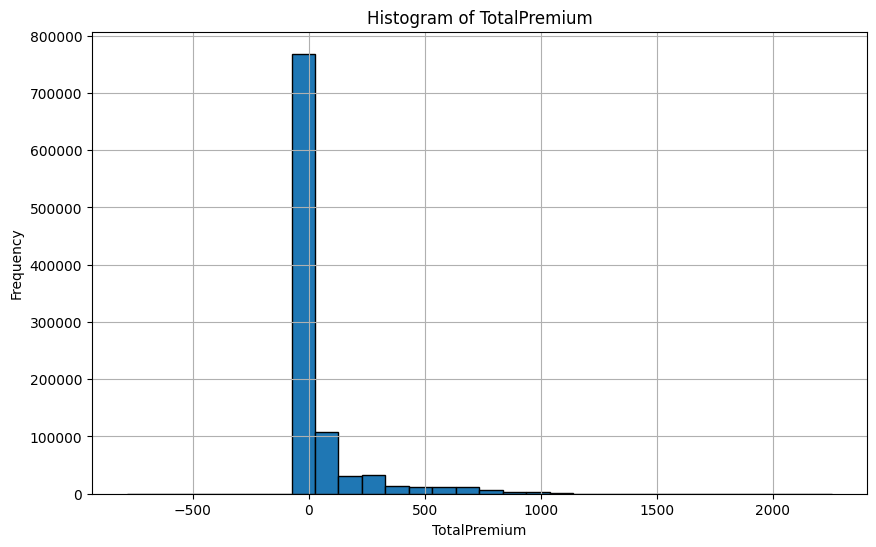

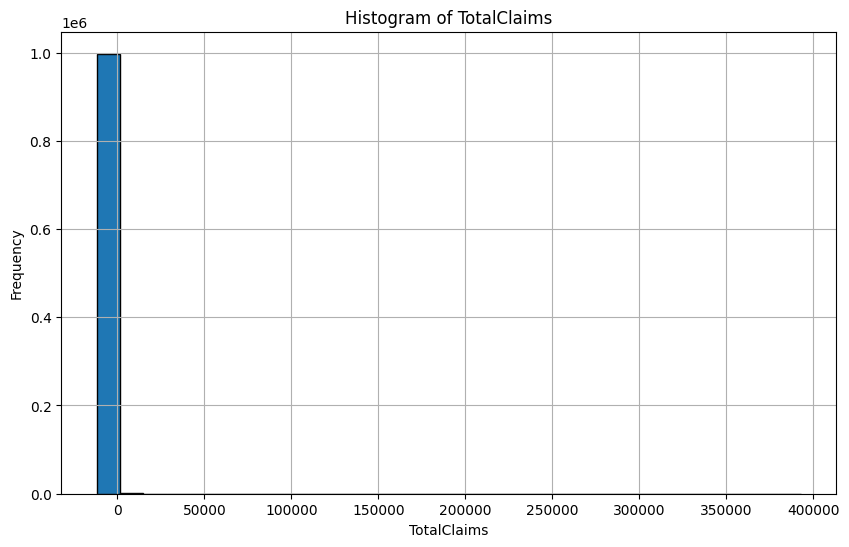

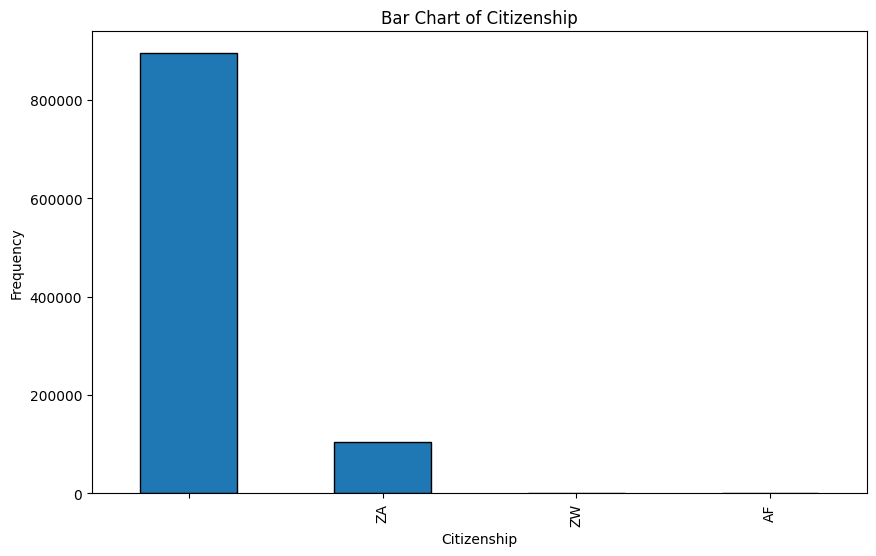

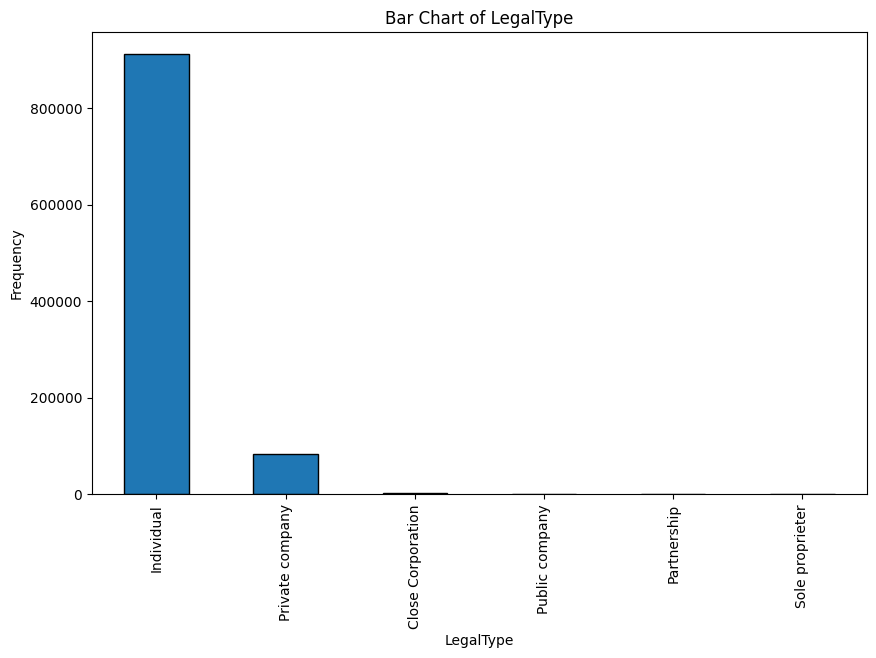

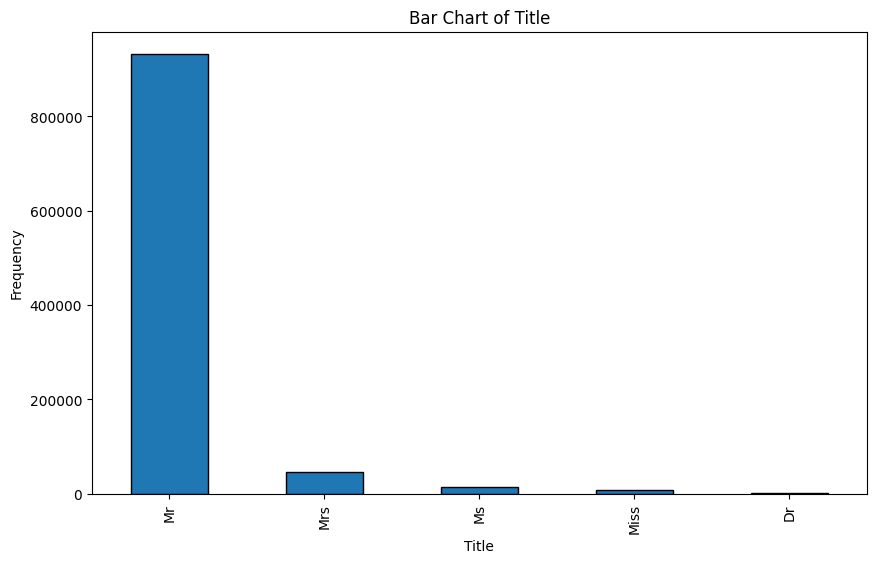

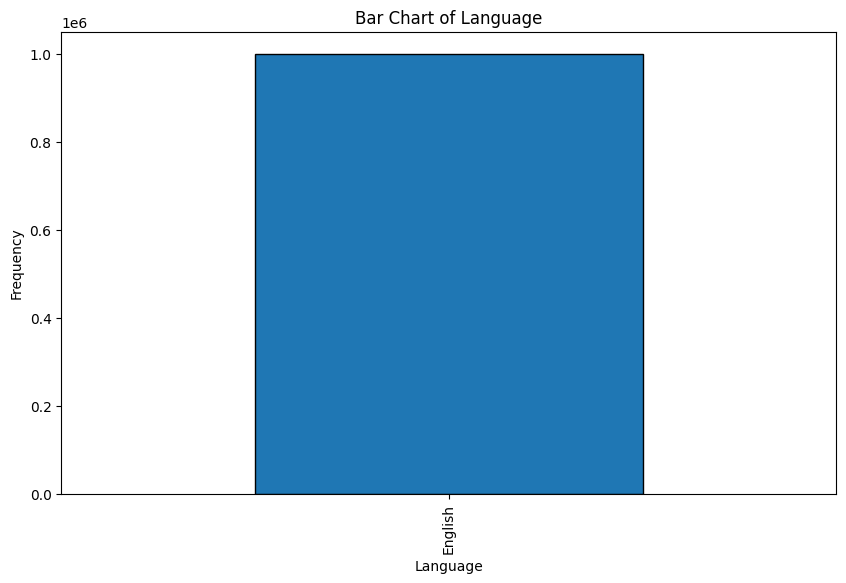

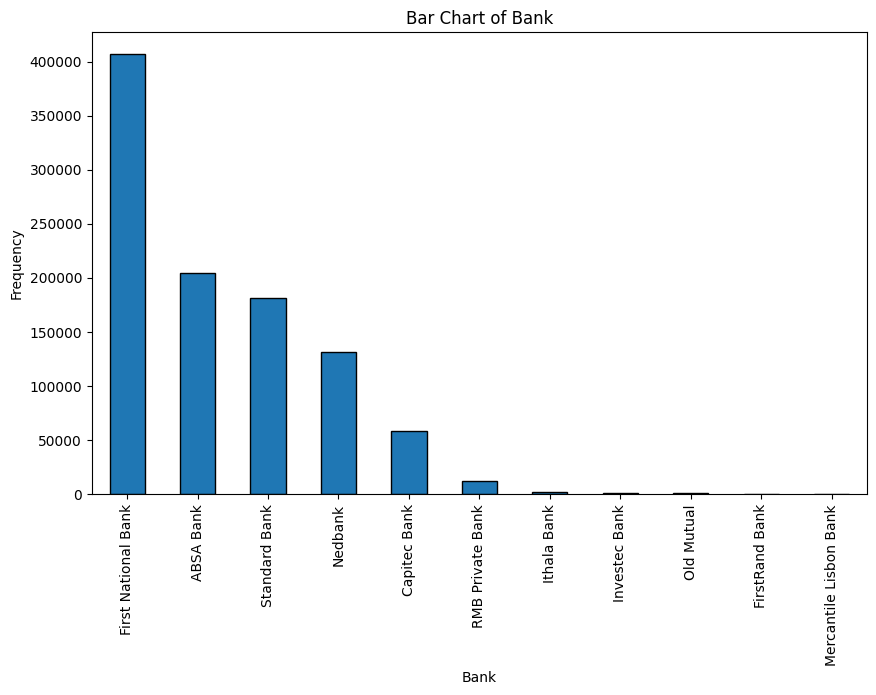

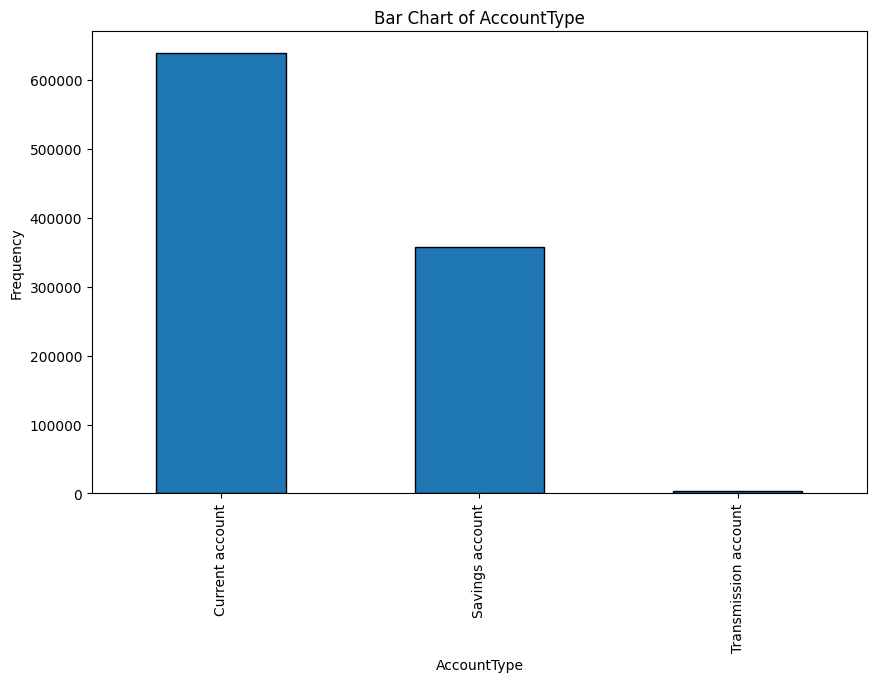

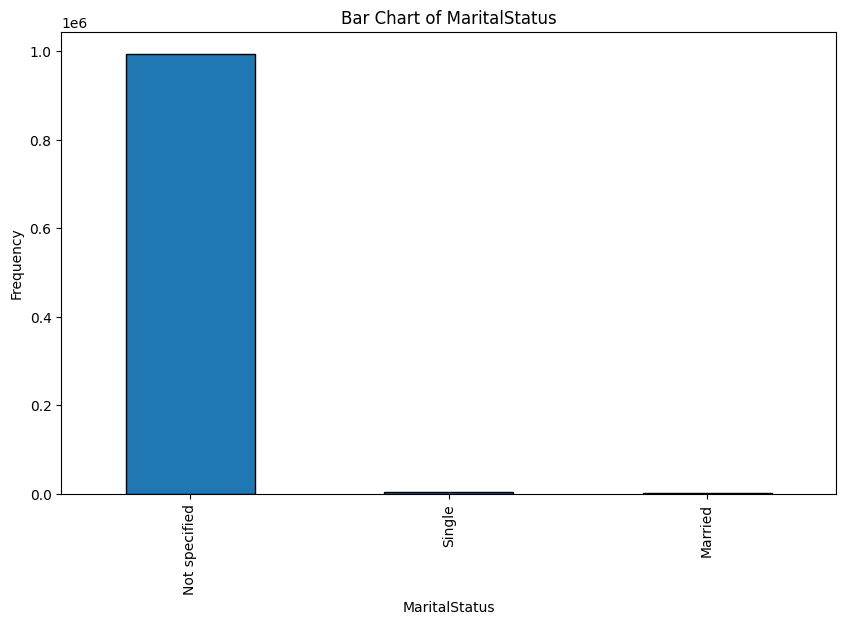

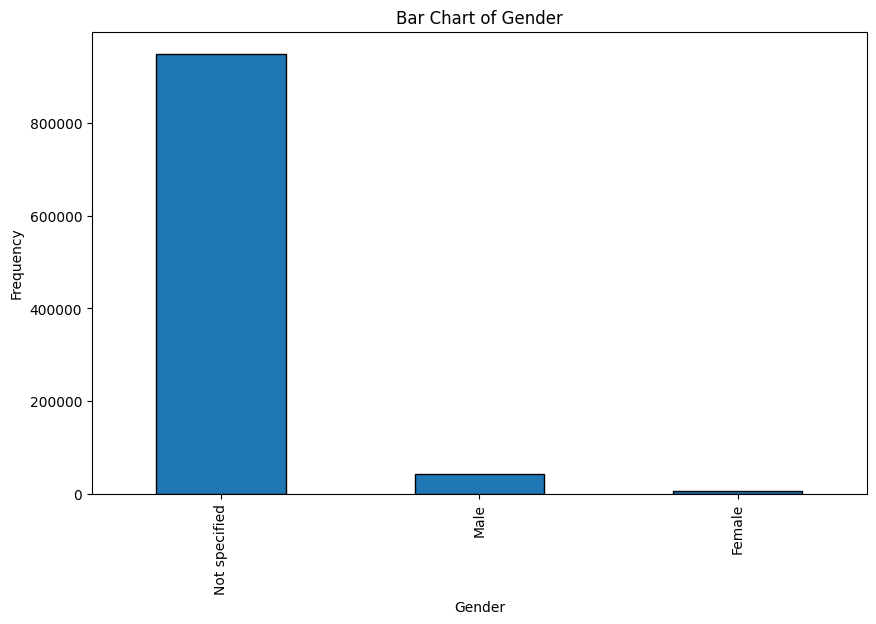

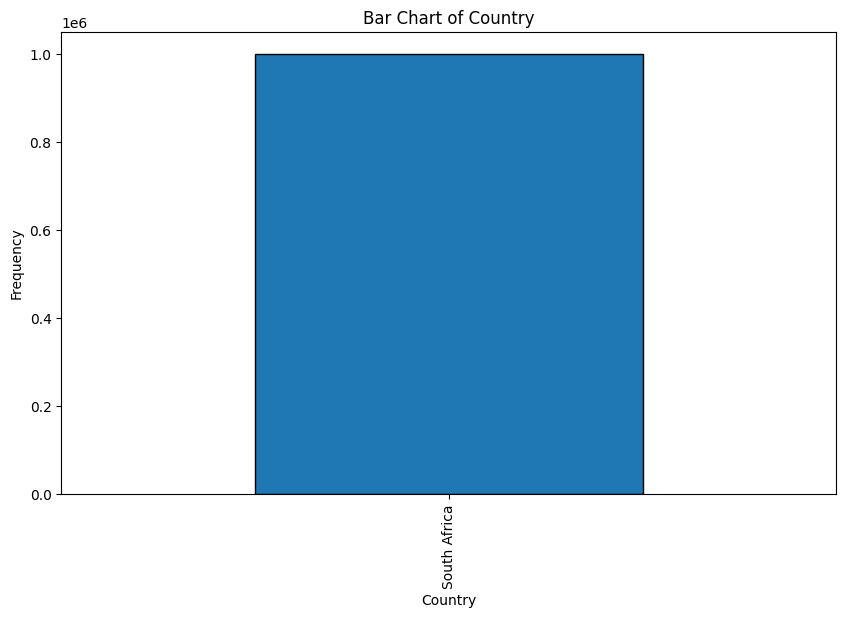

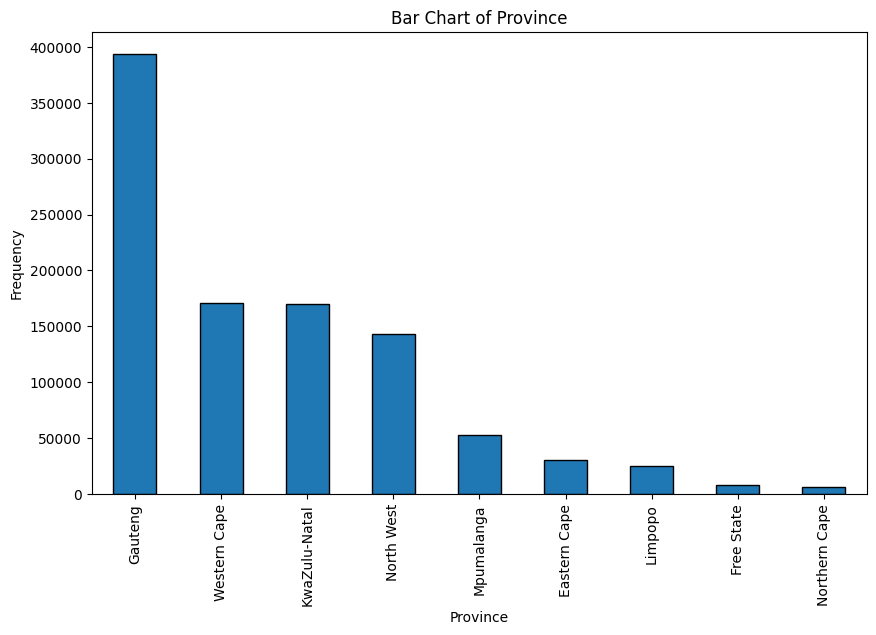

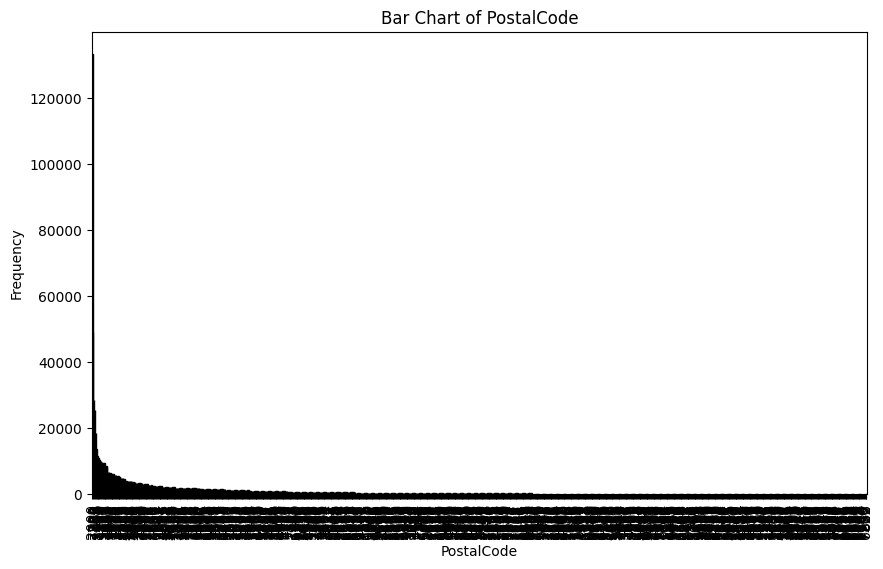

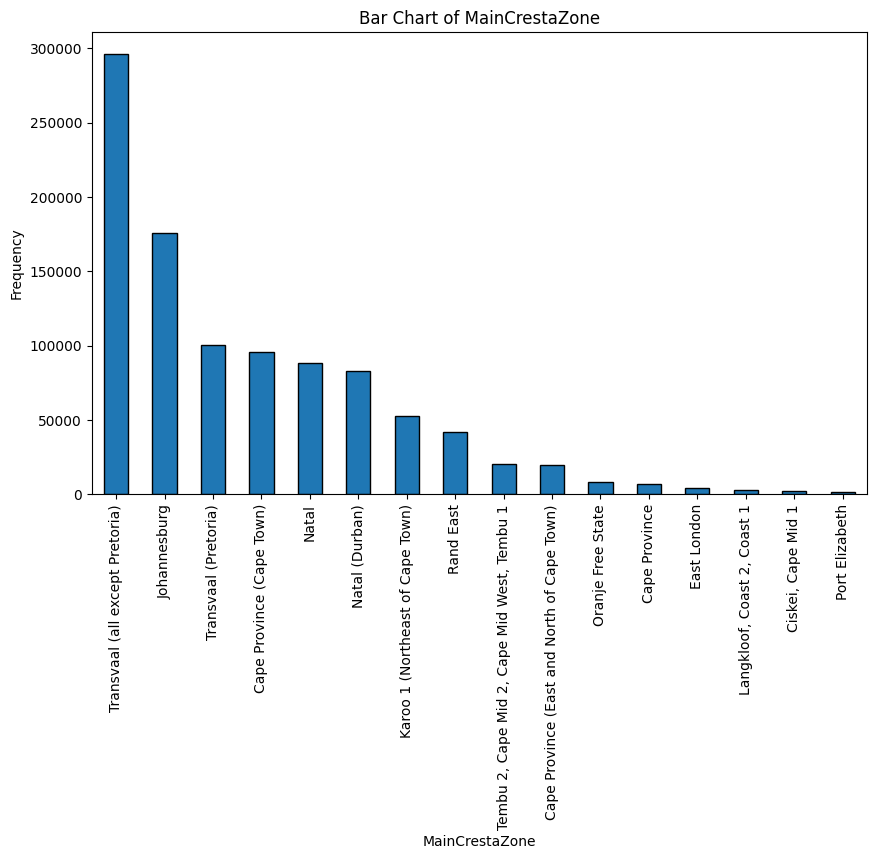

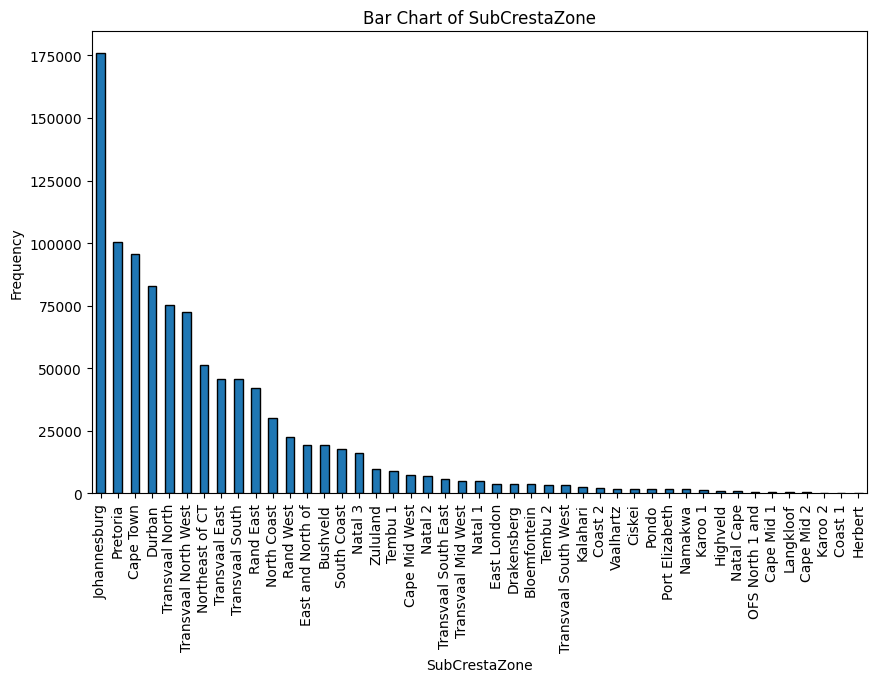

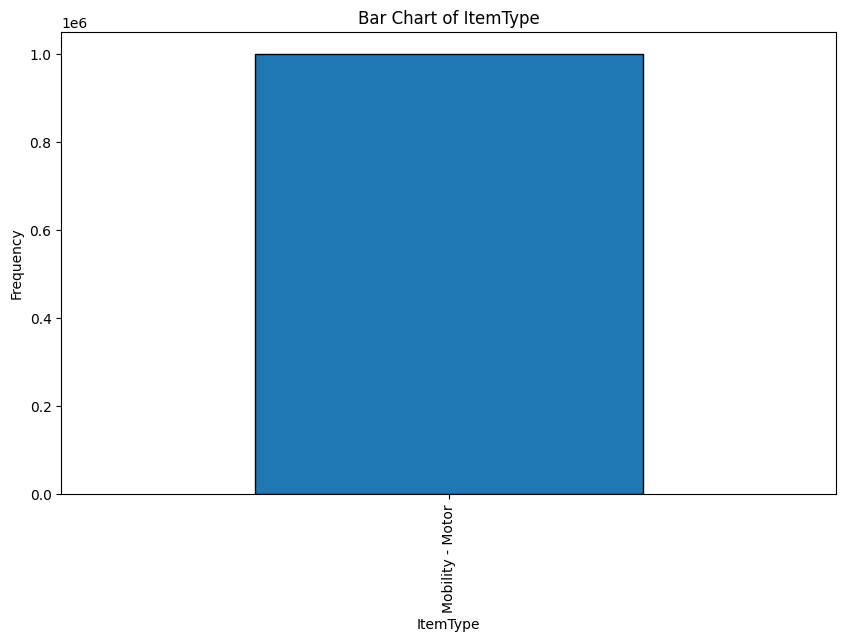

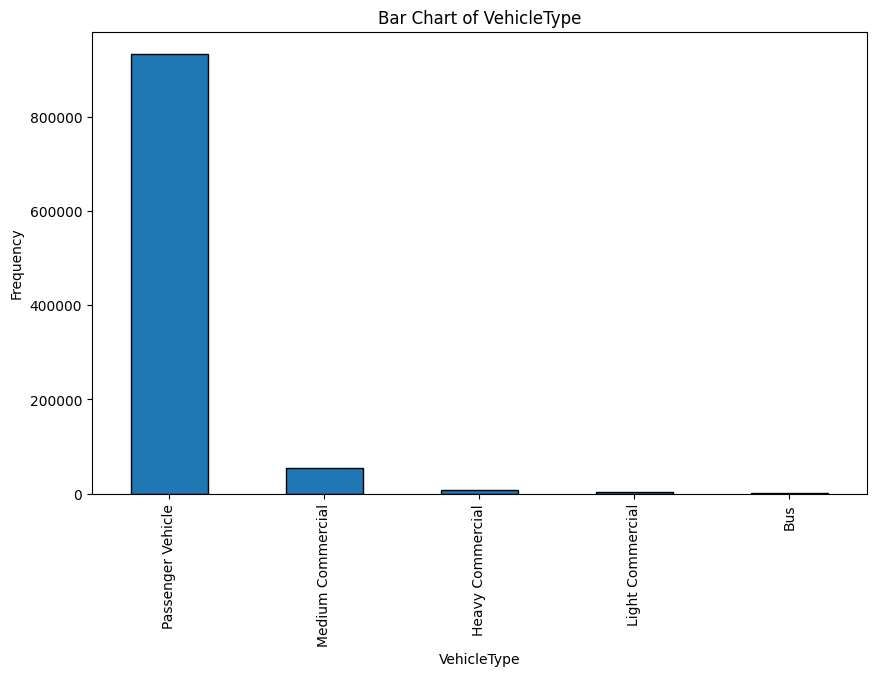

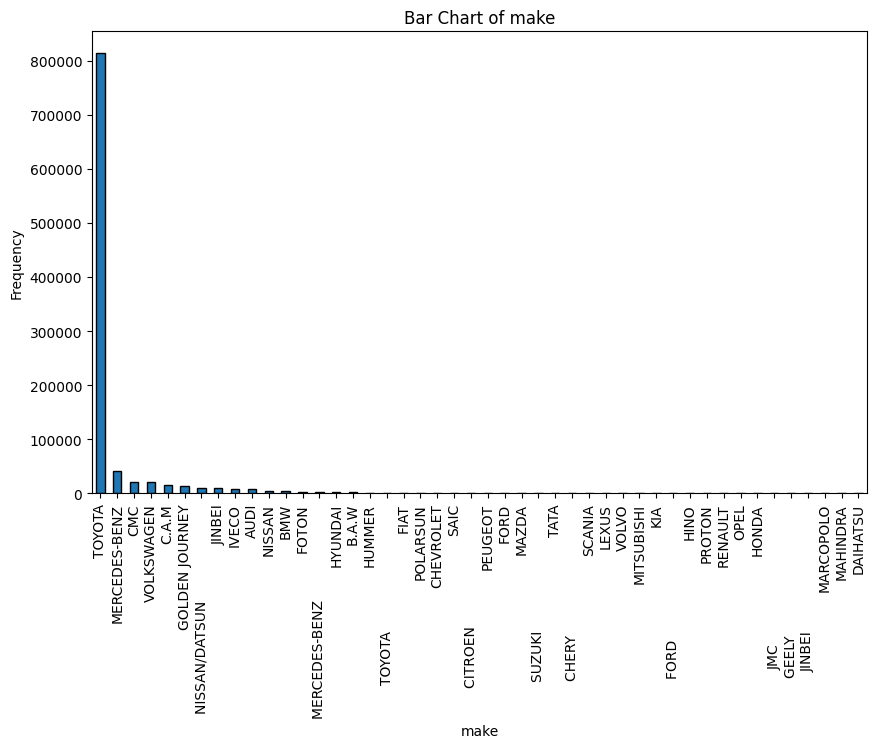

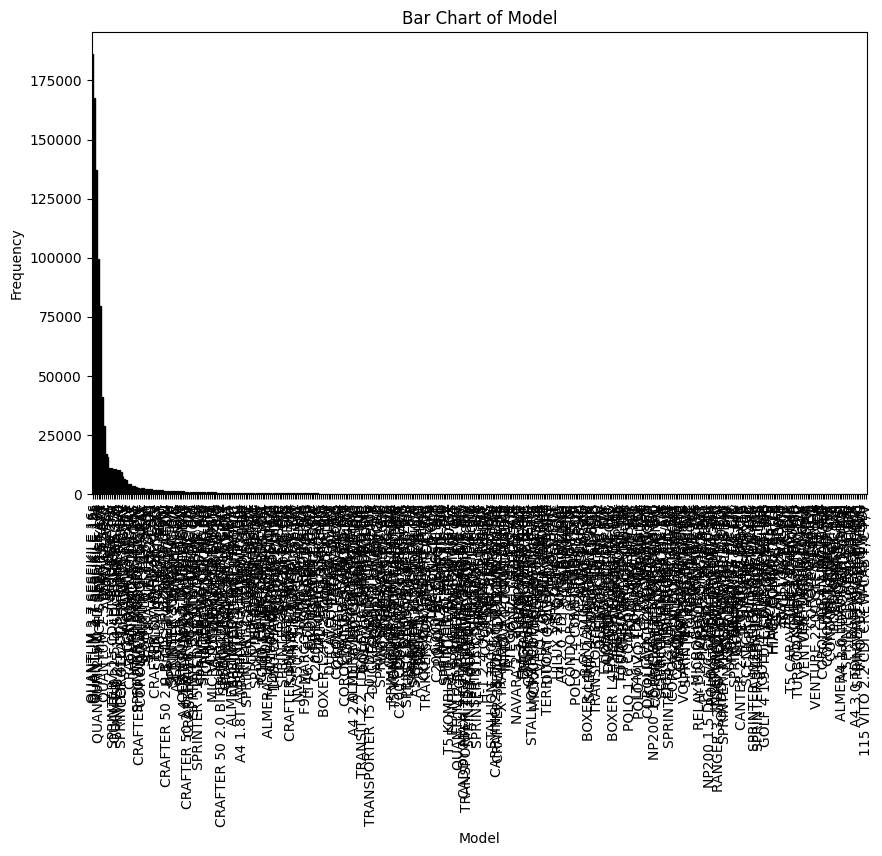

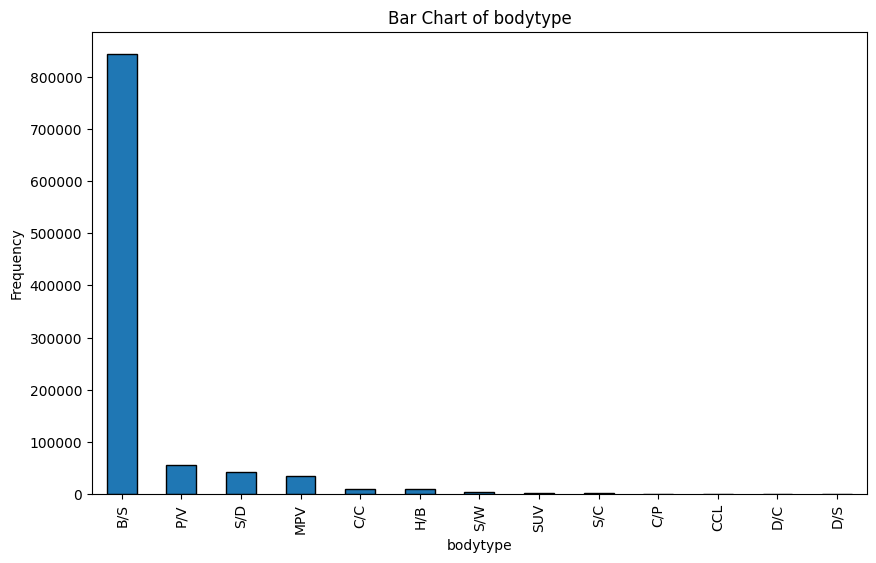

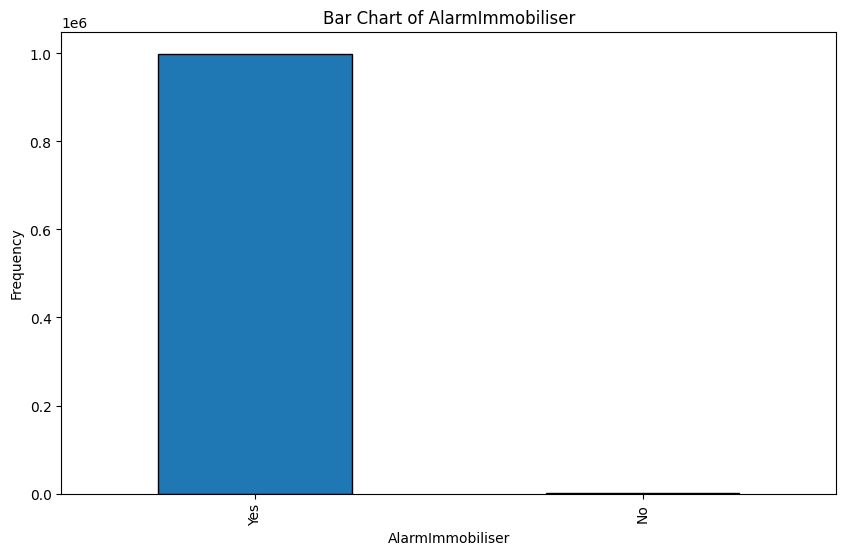

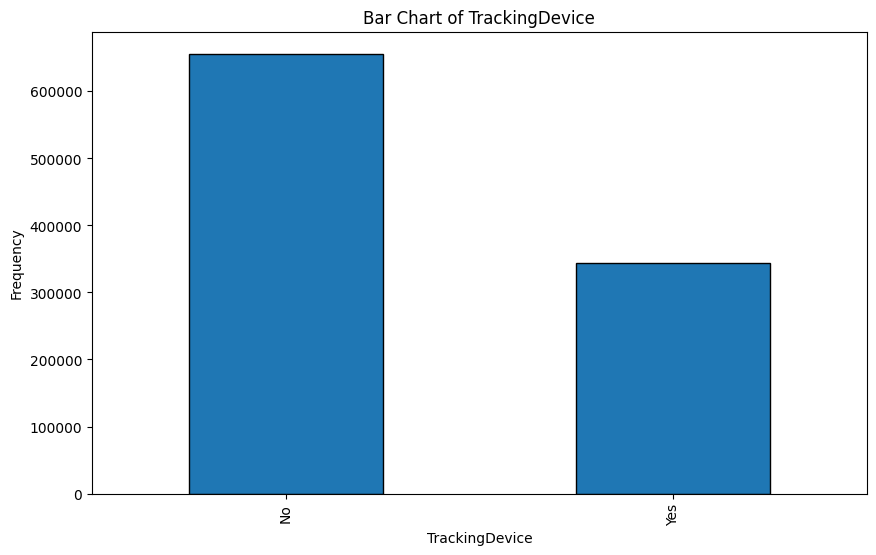

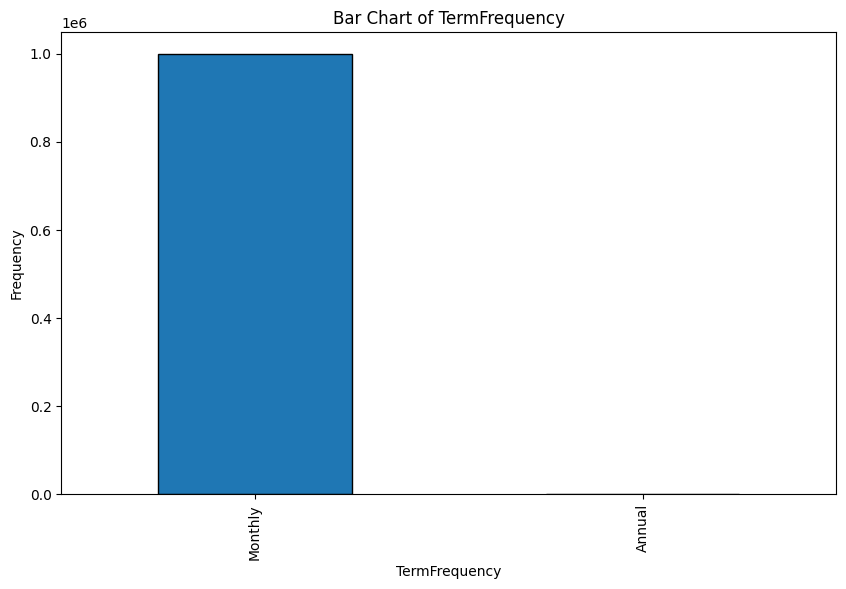

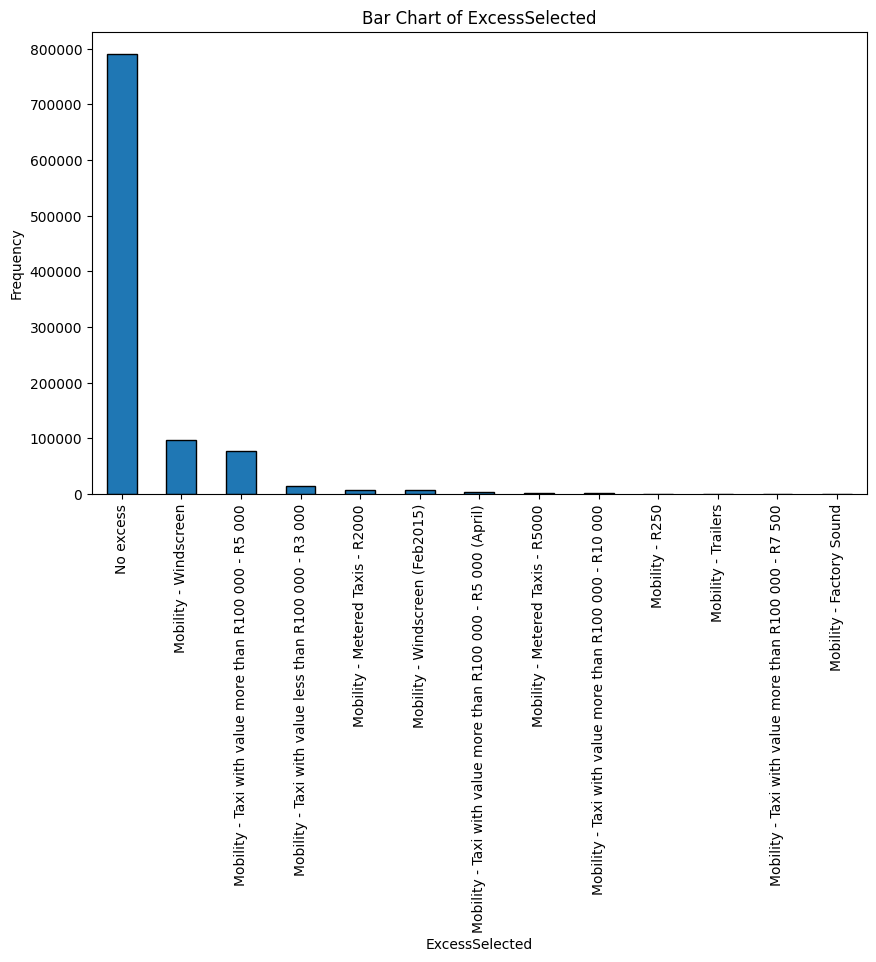

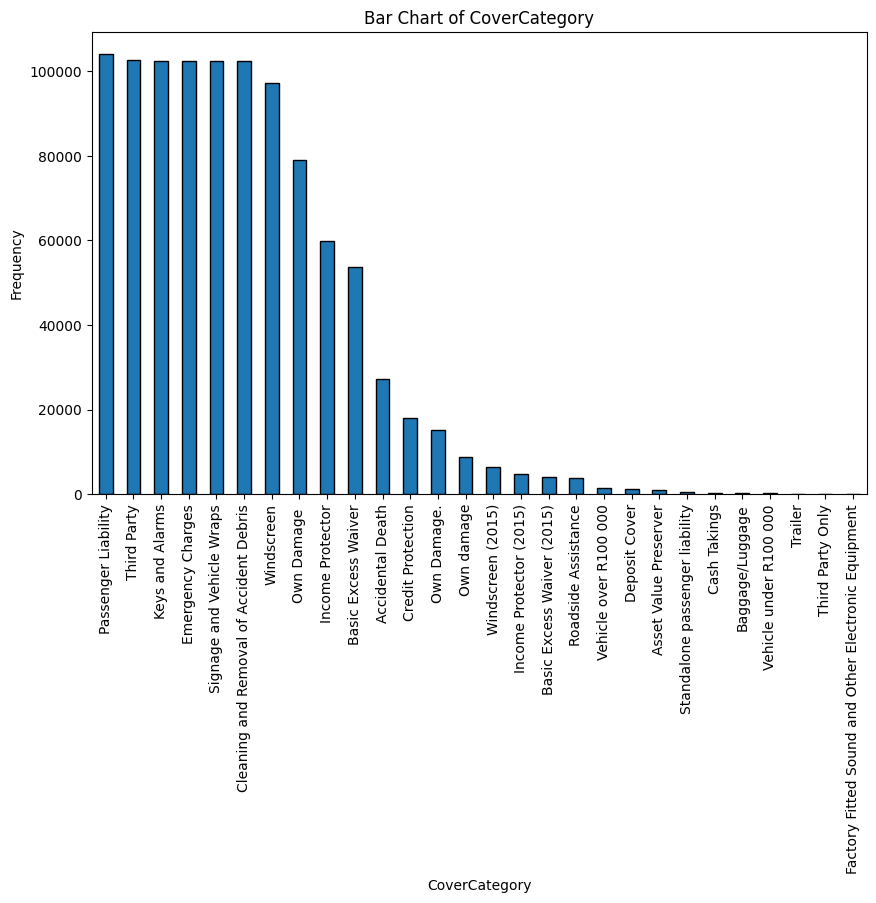

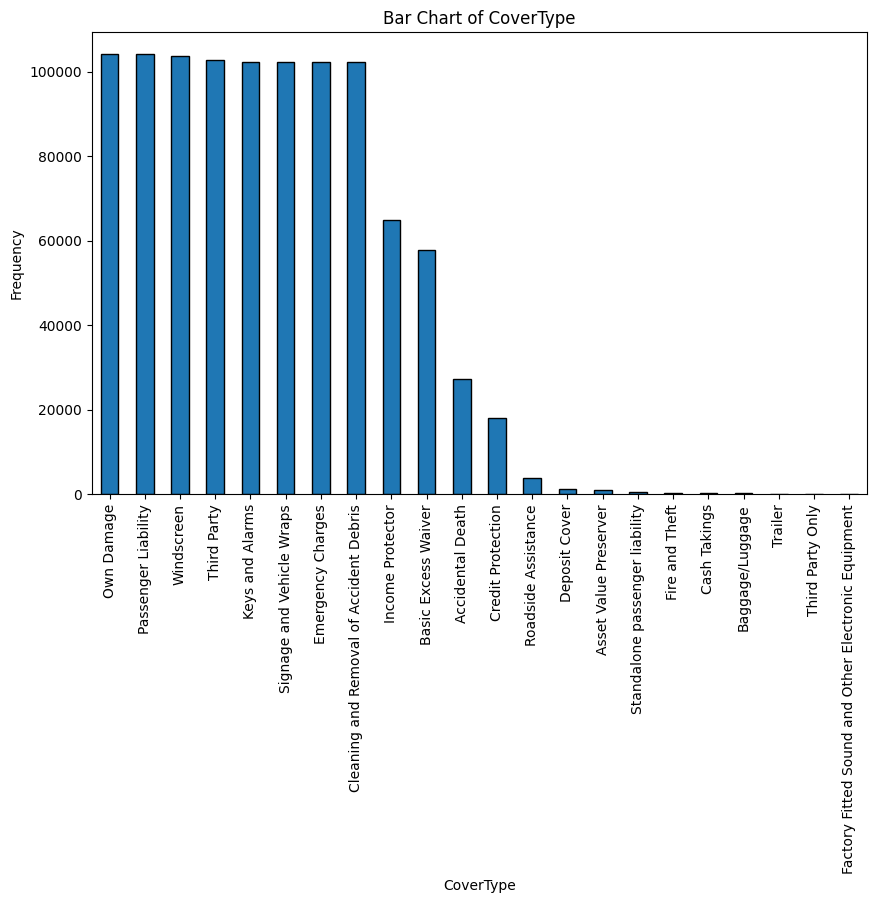

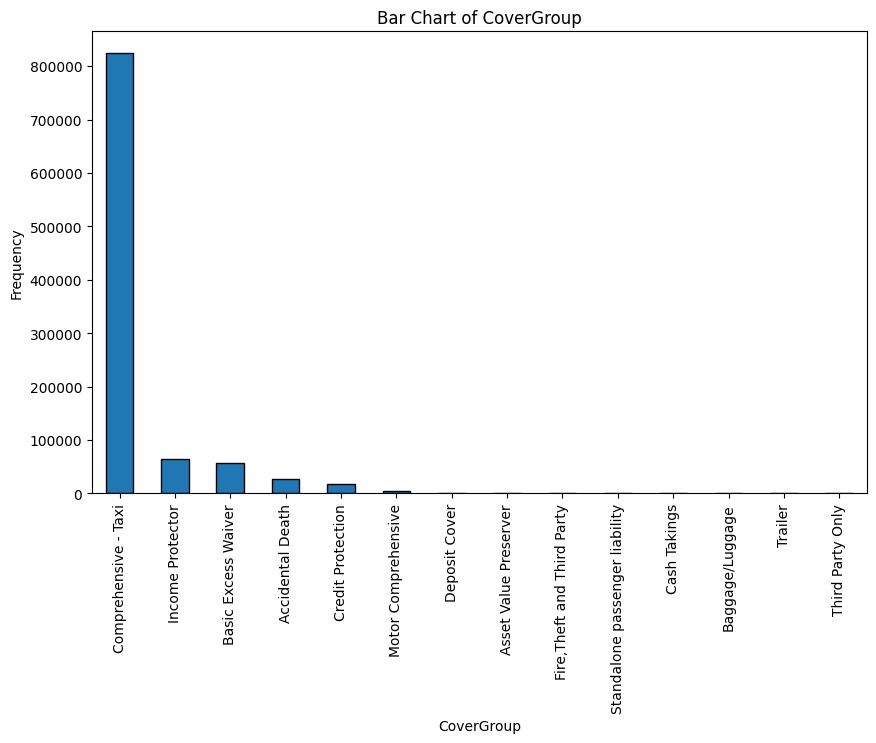

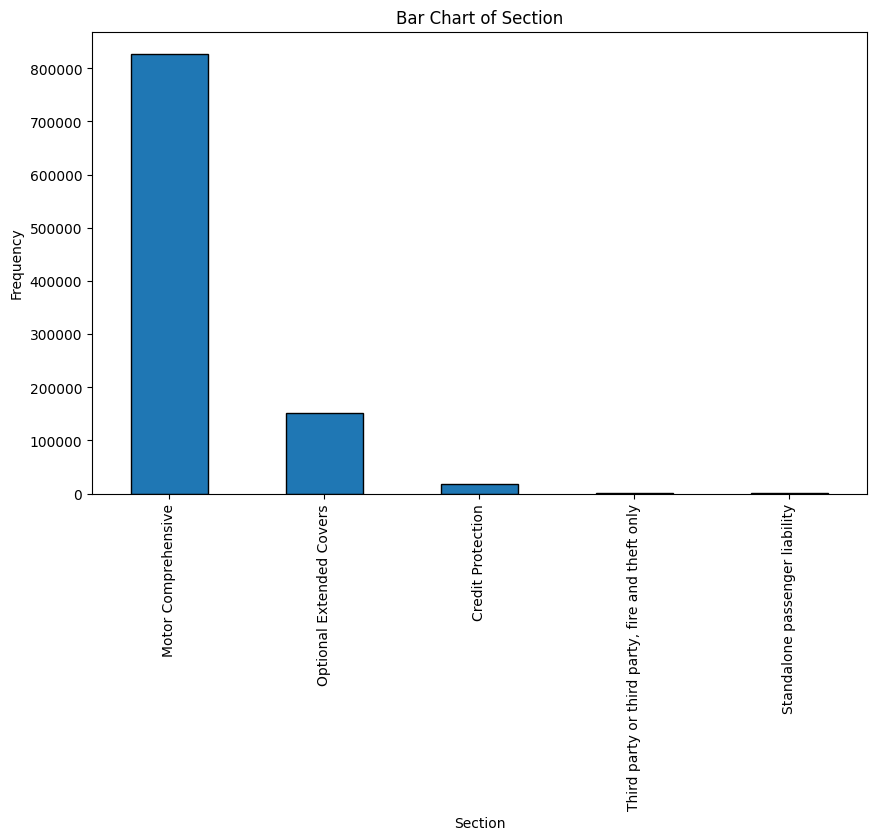

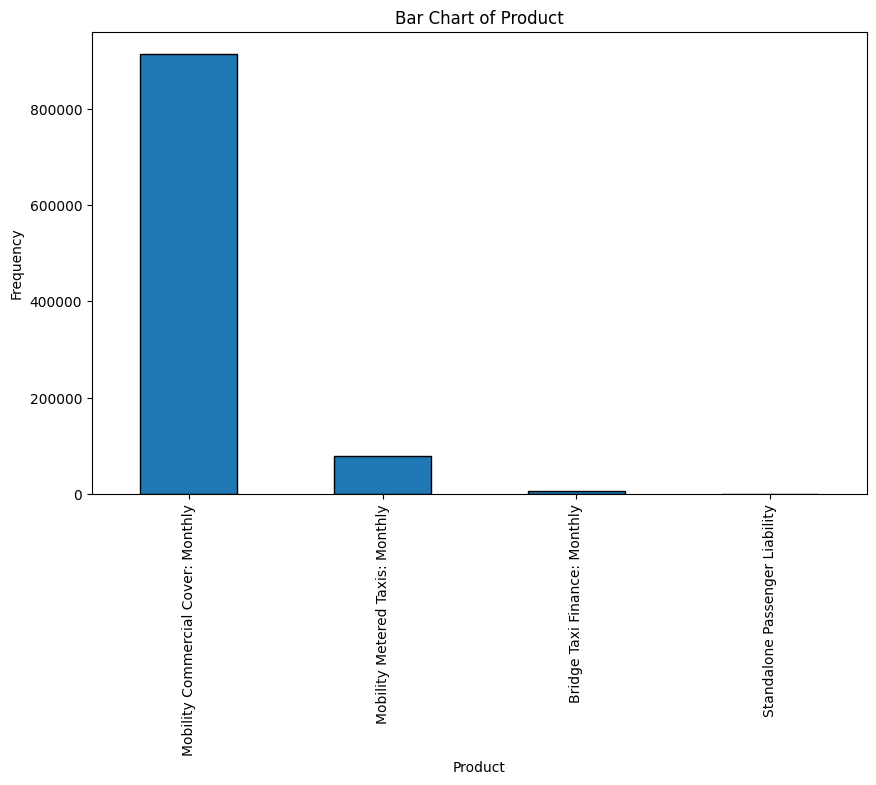

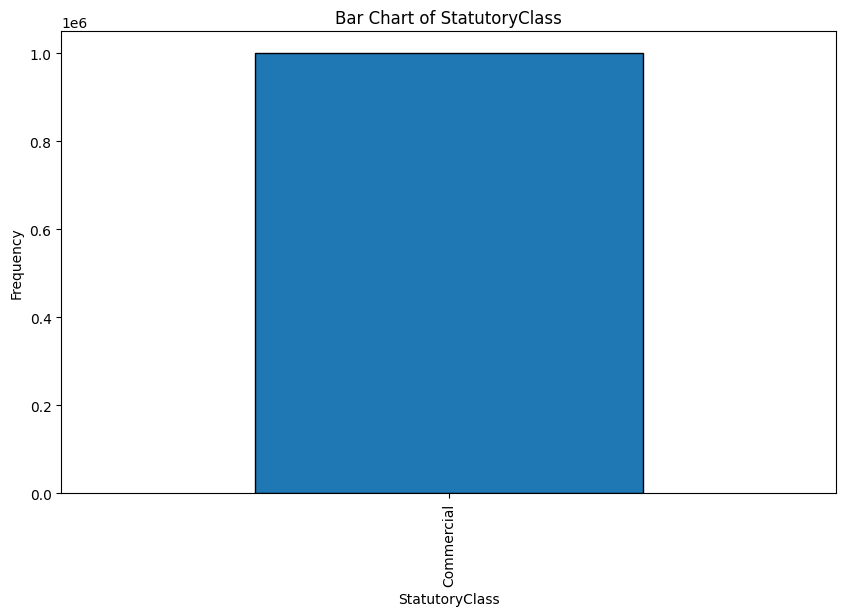

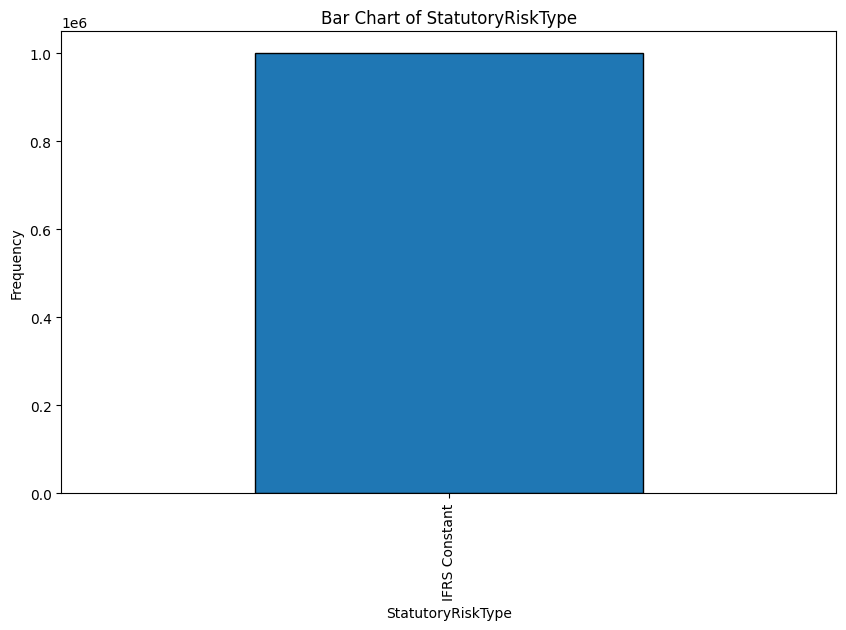

In [47]:
# Plot histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot bar charts for categorical columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

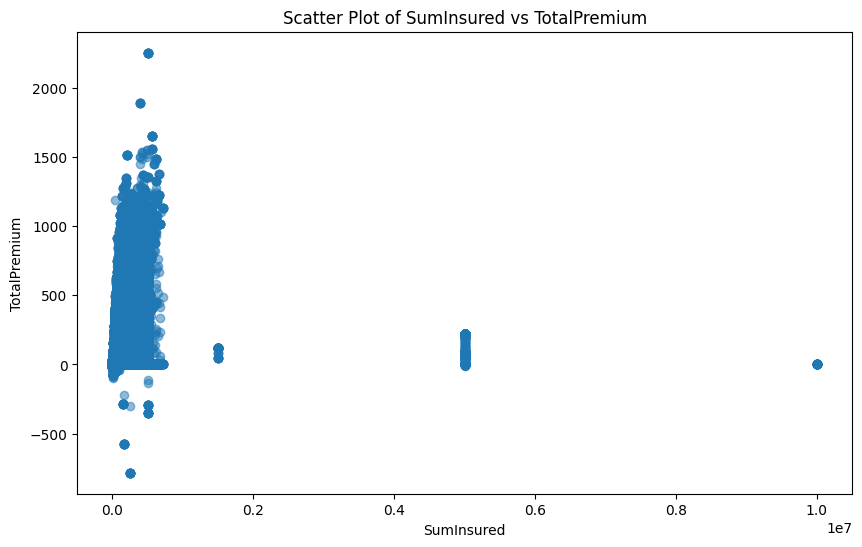

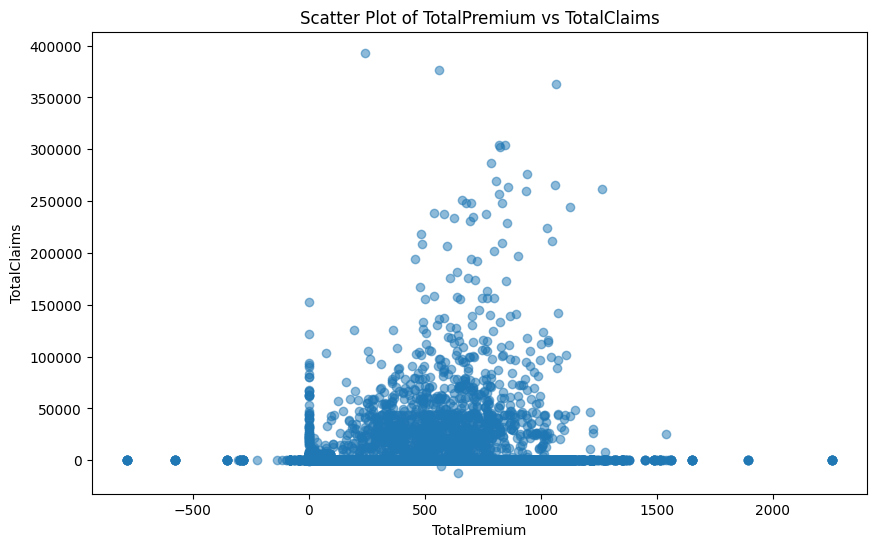

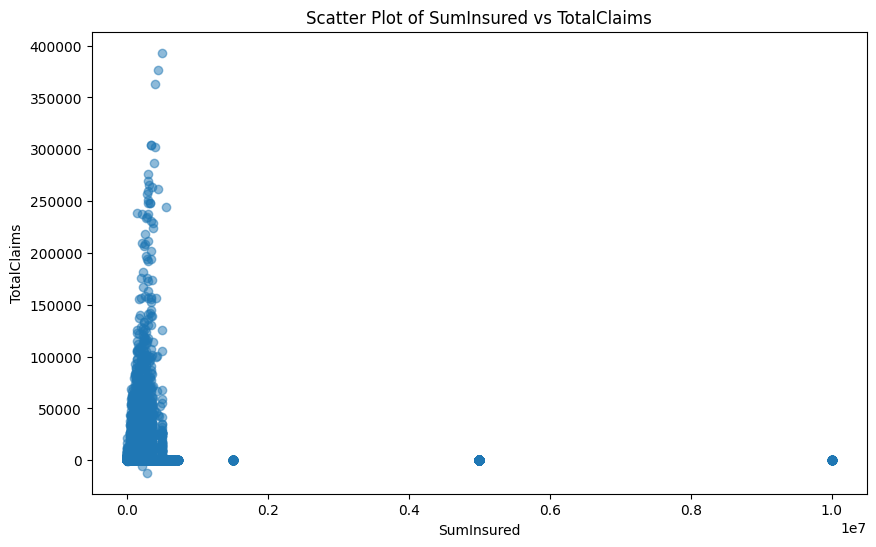

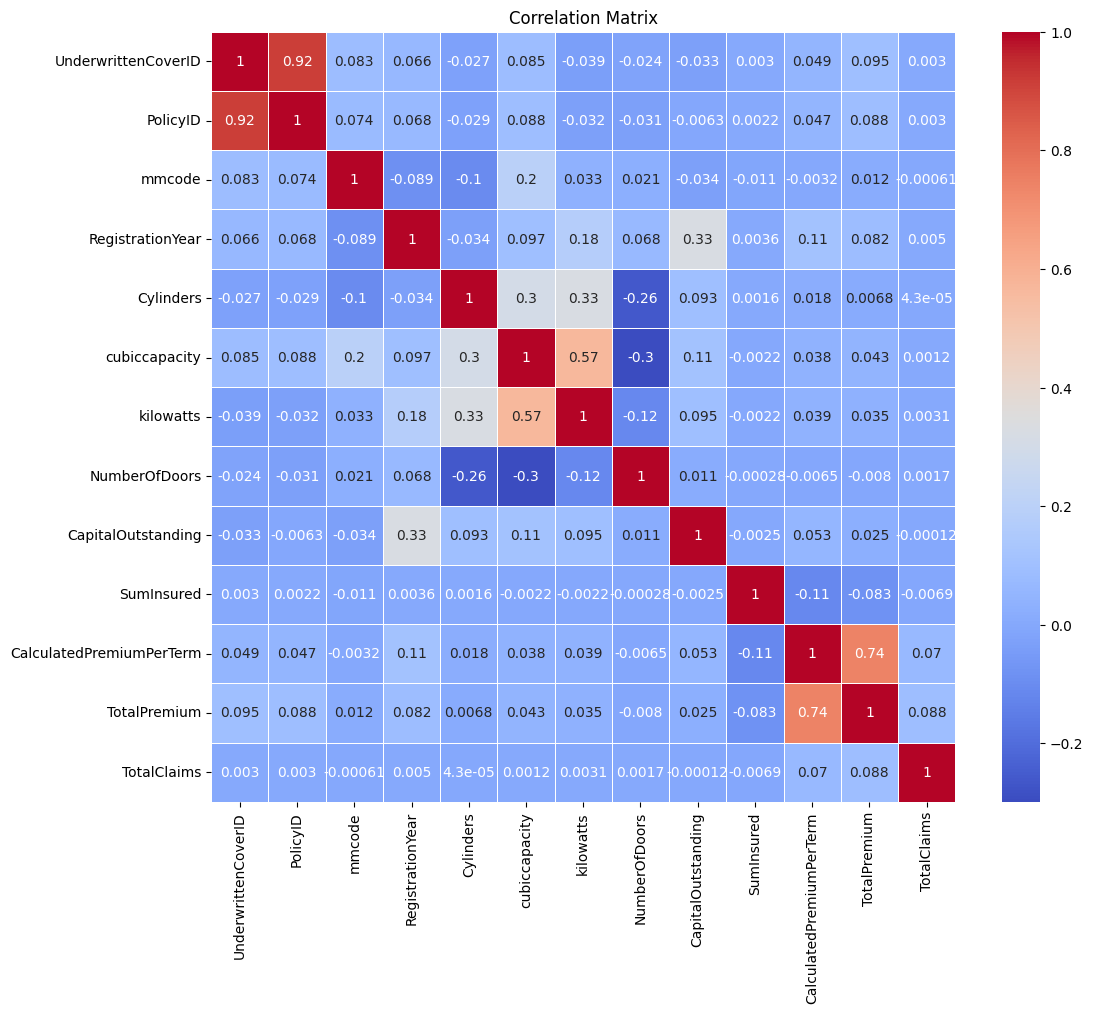

In [48]:
# Scatter plots for pairs of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Plot scatter plots for a few pairs of numerical columns
pairs = [('SumInsured', 'TotalPremium'), ('TotalPremium', 'TotalClaims'), ('SumInsured', 'TotalClaims')]

for x, y in pairs:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\1843302293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  province_claims = df.groupby('Province')['TotalClaims'].agg(['sum', 'mean']).reset_index()


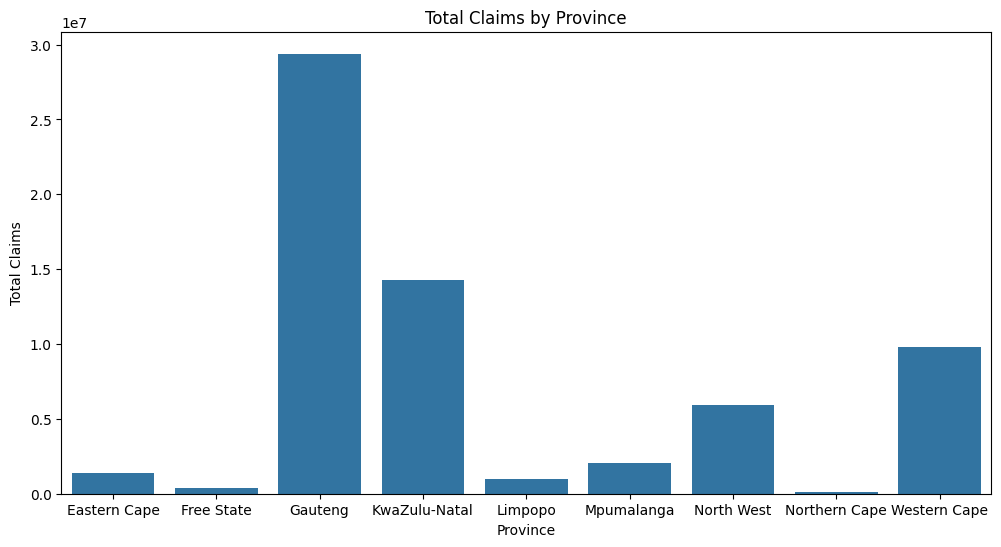

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\1843302293.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_premiums = df.groupby('VehicleType')['CalculatedPremiumPerTerm'].mean().reset_index()


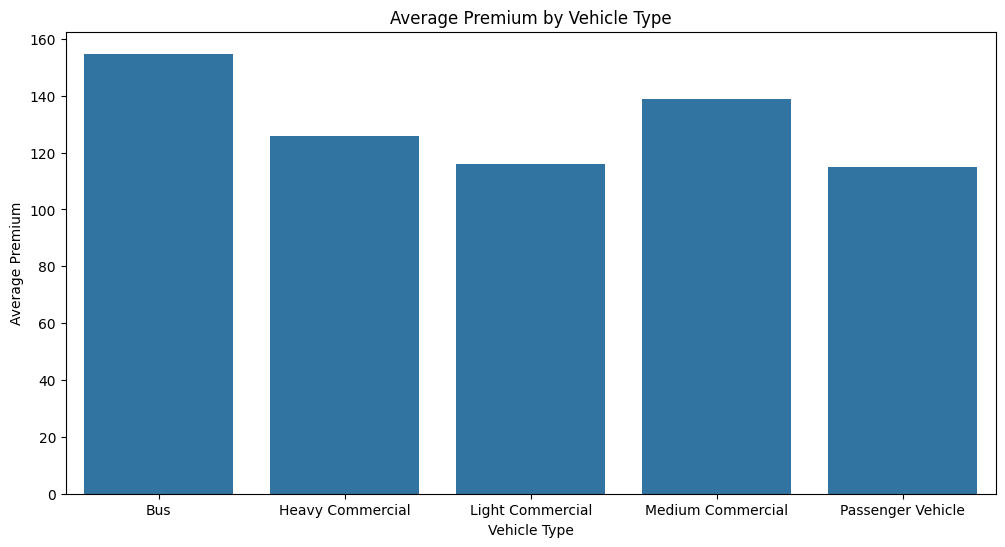

In [49]:
# Group by Province and calculate total and average claims
province_claims = df.groupby('Province')['TotalClaims'].agg(['sum', 'mean']).reset_index()

# Plotting total claims by province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='sum', data=province_claims)
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.show()

# Group by VehicleType and calculate average premium
vehicle_premiums = df.groupby('VehicleType')['CalculatedPremiumPerTerm'].mean().reset_index()

# Plotting average premium by vehicle type
plt.figure(figsize=(12, 6))
sns.barplot(x='VehicleType', y='CalculatedPremiumPerTerm', data=vehicle_premiums)
plt.title('Average Premium by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Premium')
plt.show()

## Stacked Bar Chart: Cover Type Distribution by Province

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_20448\2540942060.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Province')['CoverType'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))


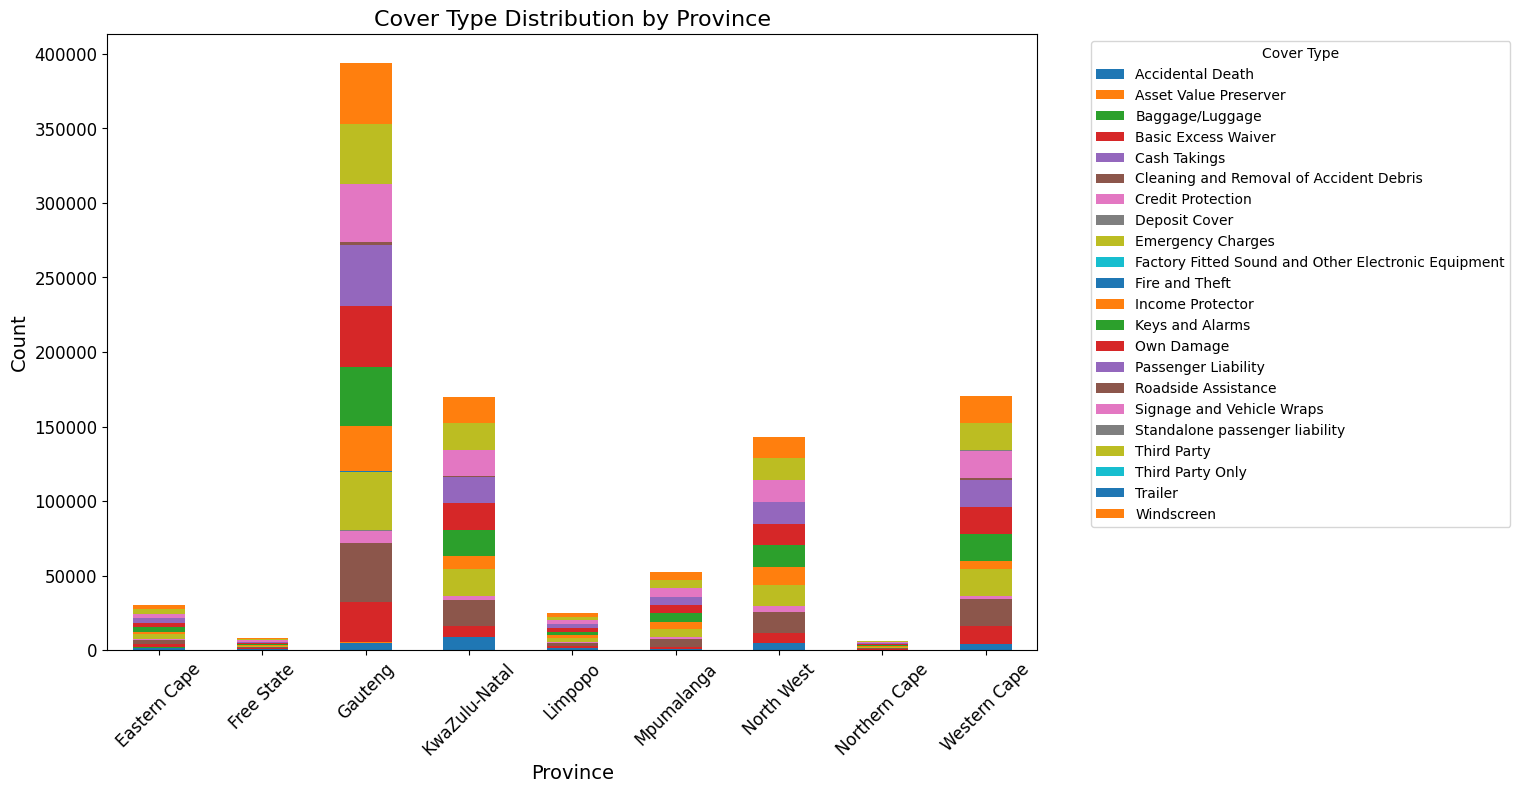

In [53]:
df.groupby('Province')['CoverType'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cover Type Distribution by Province', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()




## Time Series Plot for Premiums and Claims

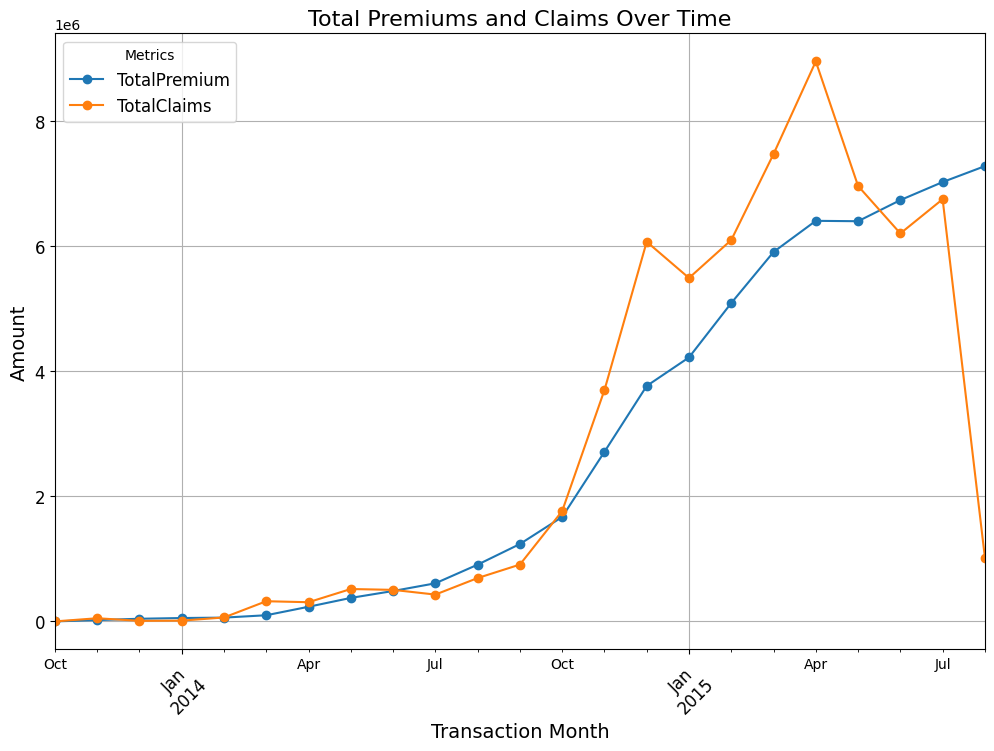

In [54]:
df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().plot(figsize=(12, 8), marker='o')
plt.title('Total Premiums and Claims Over Time', fontsize=16)
plt.xlabel('Transaction Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Metrics', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


In [57]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'CapitalOutstanding', 'SumInsured']
summary_stats = df[numerical_columns].describe()
print(summary_stats)

        TotalPremium    TotalClaims  CapitalOutstanding    SumInsured
count  999546.000000  999546.000000       999546.000000  9.995460e+05
mean       61.372315      64.340071        52634.281429  6.038693e+05
std       157.013943    2369.564716       111423.147454  1.507340e+06
min      -782.576754  -12002.412281           -2.000000  1.000000e-02
25%         0.000000       0.000000            0.000000  5.000000e+03
50%         2.179737       0.000000            0.000000  7.500000e+03
75%        21.929825       0.000000            0.000000  2.500000e+05
max      2253.507281  393092.105263       700000.000000  1.000000e+07


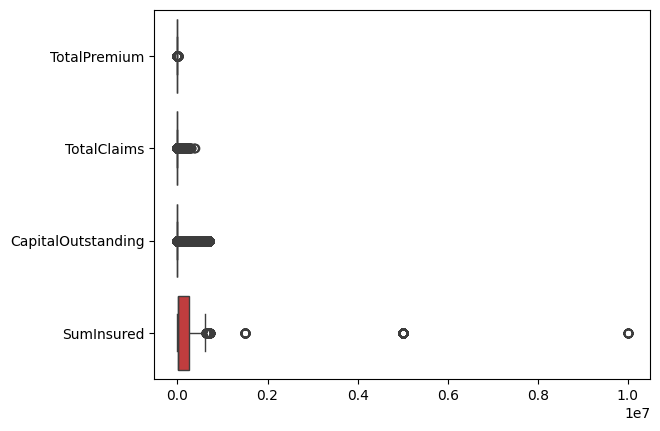

In [58]:
# Box plot to detect outliers
sns.boxplot(data=df[numerical_columns], orient='h')
plt.show()
